# **Data Analysis Project: E-Commerce Public Dataset**
- **Name:** Giselle Halim
- **Email:** gisellehalim27@gmail.com
- **Dicoding ID:** gisellehalim

**Determining Business Questions**
- How satisfied are customers with the store's service?

- Are the orders always fulfilled?
- Where are the cities and states with the most customers and sellers?
- How many customers are actively making transactions?
- How many orders do customers place?
- How many orders do sellers receive?
- What is the company's sales and revenue performance?
- What are the most and least sold products?
- How is the sales performance in each city and state?
- What is the customer behavior in making payments?
- Is there a correlation between product weight and shipping price?
- How long does it take for sellers and expeditions to process orders?
- How long does it take for sellers to respond to reviews?
- When was the last time a customer made a transaction?
- How often has a customer made a purchase in the last few months?
- How much money did the customer spend in the last few months?

# Import Libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering and Cleaning

In [110]:
sellers =  pd.read_csv('https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [111]:
customers =  pd.read_csv("https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [112]:
location =  pd.read_csv("https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/geolocation_dataset.csv")
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [113]:
product_trs =  pd.read_csv("https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/product_category_name_translation.csv")
product_trs.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [114]:
product_dataset =  pd.read_csv("https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/products_dataset.csv")
product_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [115]:
order_items =  pd.read_csv("https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [116]:
order_payments =  pd.read_csv("https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [117]:
order_reviews =  pd.read_csv("https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [118]:
order_dataset =  pd.read_csv("https://raw.githubusercontent.com/gisellehalim/data-analisis-dengan-python/main/data/orders_dataset.csv")
order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Assessing & Cleaning Data

### Asessing Sellers Data

In [119]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [120]:
print("Duplicate data: ", sellers.duplicated().sum())

Duplicate data:  0


In [121]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### Assessing Customers Data

In [122]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [123]:
print("Duplicate data: ",customers.duplicated().sum())

Duplicate data:  0


In [124]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Assessing Location Data

In [125]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [126]:
print("Duplicate data: ", location.duplicated().sum())

Duplicate data:  261831


In [127]:
location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [128]:
location.drop_duplicates(inplace=True)
print("Duplicate data: ", location.duplicated().sum())

Duplicate data:  0


In [129]:
location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


### Asessing Product_trs Data

In [130]:
product_trs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [131]:
product_trs.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

### Asessing Product_dataset Data

In [132]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [133]:
product_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [134]:
product_dataset = product_dataset.dropna()
product_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [135]:
print("Duplicate data: ", product_dataset.duplicated().sum())
product_dataset.describe()

Duplicate data:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [136]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [137]:
# Creating mapping for translation
mapping_dict = dict(zip(product_trs["product_category_name"], product_trs["product_category_name_english"]))

# Renaming product categories to English
product_dataset["product_category_name"] = product_dataset["product_category_name"].map(mapping_dict)

In [138]:
product_dataset.isna().sum()

product_id                     0
product_category_name         13
product_name_lenght            0
product_description_lenght     0
product_photos_qty             0
product_weight_g               0
product_length_cm              0
product_height_cm              0
product_width_cm               0
dtype: int64

In [139]:
product_dataset = product_dataset.dropna()

### Asessing Order_items Data

In [140]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [141]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [142]:
print("Duplicate data: ", order_items.duplicated().sum())
order_items.describe()

Duplicate data:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Assessing Order_payments Data

In [143]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [144]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [145]:
print("Duplicate data: ", order_payments.duplicated().sum())
order_payments.describe()

Duplicate data:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Asessing Order_reviews Data

In [146]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [147]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [148]:
#order_reviews = order_reviews.dropna()

In [149]:
print("Duplicate data: ", order_reviews.duplicated().sum())

Duplicate data:  0


### Asessing Order_dataset Data

In [150]:
order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [151]:
order_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [152]:
order_dataset = order_dataset.dropna()

In [153]:
print("Duplicate data: ", order_dataset.duplicated().sum())

Duplicate data:  0


## Merging

In [154]:
df = order_dataset.merge(order_items, on='order_id')
df = df.merge(order_payments, on='order_id')
df = df.merge(product_dataset, on='product_id')
df = df.merge(sellers, on='seller_id')
df = df.merge(customers, on='customer_id')

In [155]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,9350,maua,SP,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,9350,maua,SP,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP


In [156]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [157]:
print("Duplicate data: ", df.duplicated().sum())

Duplicate data:  0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 113366
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   order_item_id                  113367 non-null  int64  
 9   product_id                     113367 non-null  object 
 10  seller_id                      113367 non-null  object 
 11  shipping_limit_date            113367 non-null  object 
 12  price                         

In [159]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state        

In [161]:
# Change the date data format
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date
df['order_approved_at'] = pd.to_datetime(df['order_approved_at']).dt.date
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.date
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date']).dt.date
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date']).dt.date
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date']).dt.date
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp']).dt.date

# Exploratory Data Analysis (EDA)

## Data Exploration

### Review Score (How satisfied are customers with store services?)

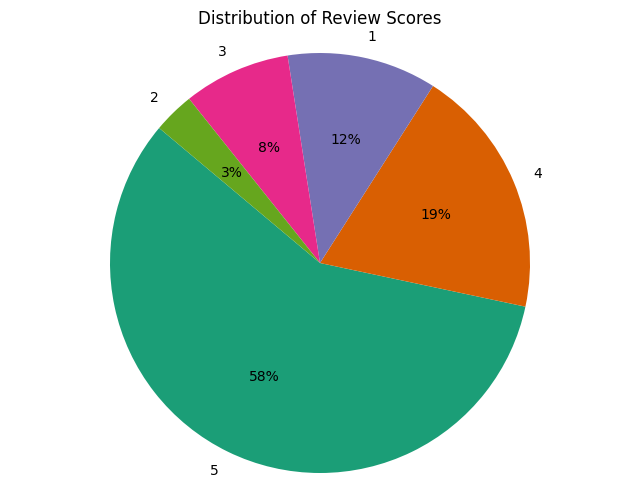

In [173]:
from matplotlib.pyplot import figure

palet_warna = sns.color_palette('Dark2')

# COunt review score
review_score_counts = order_reviews['review_score'].value_counts().sort_values(ascending=False)

# Create pie chart
plt.figure(figsize=(8, 6))
sns.set_palette(palet_warna)
plot = plt.pie(review_score_counts, labels=review_score_counts.index, autopct='%.0f%%', startangle=140)

plt.title('Distribution of Review Scores')
plt.axis('equal')

plt.show()

In [174]:
# Count review score
order_reviews.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

**Insight**

- Based on the review data, most customers are satisfied with the store's service. This is shown by more than 57,076 customers giving a rating of 5 out of 98,875 total customers (58%).

- The number of ratings of 1 ranks third out of all ratings, with 11,393 total ratings.


### Order Status (Is the order always fulfilled?)

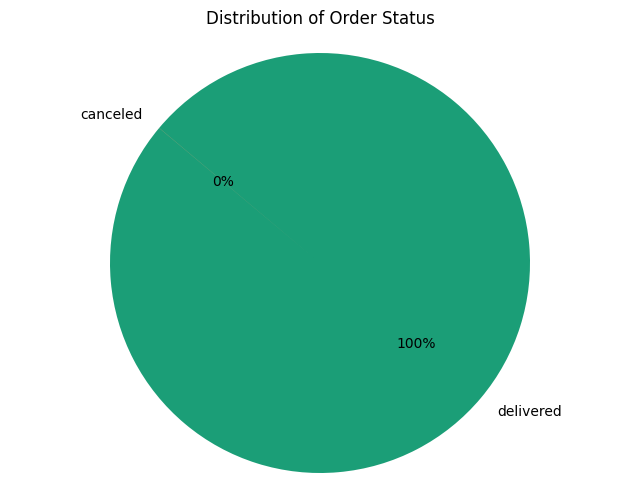

In [175]:
palet_warna = sns.color_palette('Dark2')

# Count order status
order_stats_counts = df['order_status'].value_counts().sort_values(ascending=False)

# Create pie chart
plt.figure(figsize=(8, 6))
sns.set_palette(palet_warna)
plot = plt.pie(order_stats_counts, labels=order_stats_counts.index, autopct='%.0f%%', startangle=140)

plt.title('Distribution of Order Status')
plt.axis('equal')

plt.show()

In [176]:
# Count order status
df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered    95103
canceled         6
Name: order_id, dtype: int64

**Insight**

- Almost all orders were successfully carried out, with 95103 orders delivered and only 6 orders canceled.


### Customers in Each City (Where are the cities and states with the most customers?)

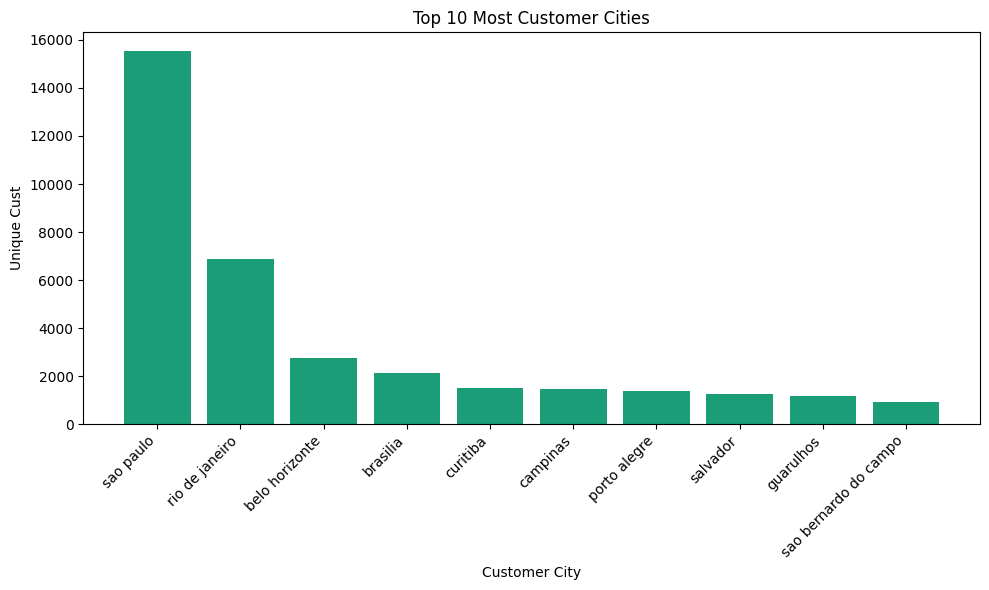

In [177]:
# Count customers in each city
customer_city= customers.groupby('customer_city')['customer_id'].count().reset_index()

# 10 cities with the most customers (customer origin city)
top_10_cities = customer_city.nlargest(10, 'customer_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['customer_id'])

plt.xlabel('Customer City')
plt.ylabel('Unique Cust')
plt.title('Top 10 Most Customer Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

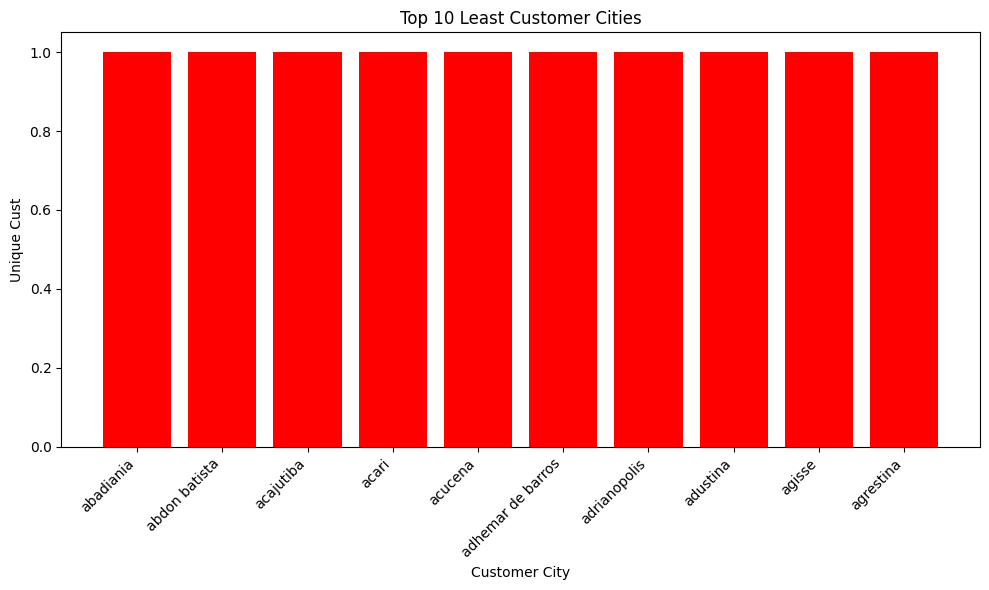

In [178]:
# 10 cities with the fewest customers (customer origin city)
top_10_cities = customer_city.nsmallest(10, 'customer_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['customer_id'], color='red')

plt.xlabel('Customer City')
plt.ylabel('Unique Cust')
plt.title('Top 10 Least Customer Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**

- Most customers are from the city of Sao Paolo (almost 16,000 customers). This could be related to Sao Paulo's status as the most populated city in Brazil.

- There are at least 10 cities that only have 1 customer, such as Abadiania, Acari, Agisse, etc.

### Customer Active Status (How many customers are actively making transactions?)

In [179]:
# Create customer_id list in df
customer_id_list = df['customer_id'].tolist()

# Customer is active if customer_id is in df
customers["status"] = np.where(customers["customer_id"].isin(customer_id_list), "Active", "Non Active")

print(customers.sample(5))

                            customer_id                customer_unique_id  \
9711   e7679548f90781fac8359cdbe2e2c729  eb95548b5609bc72326178567edf6f69   
57543  a9e98a5c4f40a6797f748ffe05967bfc  3fde62a45bdc97d762c7be33f7c4f62c   
40653  b3f63321d868c01dfd7a025899954ec5  5833091bd6d3920f81518b02adac60cf   
17812  aae50600d30bf2efe013ca4c1754ded7  bdc67efa33dd0c3228b91714ac6e363c   
77908  e26866fcad952f322729ccd8b71e2758  4dd1c231ef57f033021044544dc5836d   

       customer_zip_code_prefix   customer_city customer_state      status  
9711                       7600       mairipora             SP      Active  
57543                     36120  matias barbosa             MG      Active  
40653                     26587        mesquita             RJ      Active  
17812                     23027  rio de janeiro             RJ  Non Active  
77908                     26520       nilopolis             RJ      Active  


In [180]:
# Count the number of active and inactive customers
customers.groupby(by="status").customer_id.count()

status
Active        95109
Non Active     4332
Name: customer_id, dtype: int64

**Insights**

- Almost all customers in the e-commerce database are active, with 95,109 being active (having placed orders within 2016 - 2018) and 4332 being inactive (having not placed orders within 2016 - 2018).


### Customers and Orders (How many orders did the customer place?)

<ipython-input-181-a65cbc655a6b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')


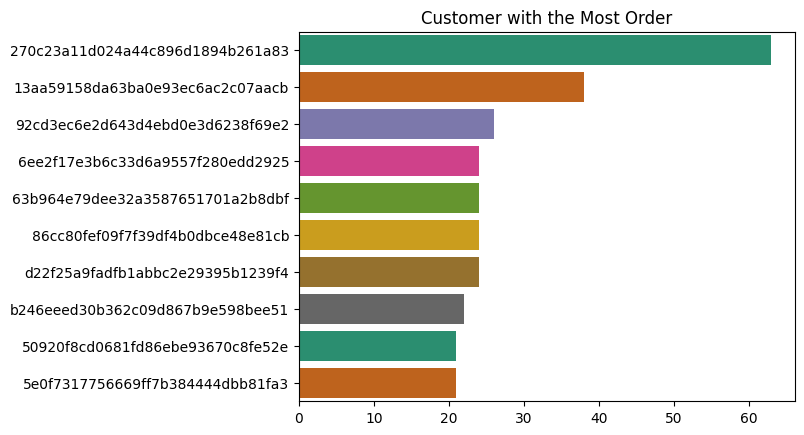

<Figure size 1000x2000 with 0 Axes>

In [181]:
#Univariate analysis to see which customers order most often
data_plot  = df['customer_id'].value_counts()[:10].to_list()
label_plot = df['customer_id'].value_counts()[:10].index.to_list()

title = 'Customer with the Most Order'

plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')
plot_title = plt.title(title)

fig = plt.figure(figsize=(10, 20))
plt.show()

In [182]:
# Customers who order most frequently with the number of orders that have been placed
df.groupby(by="customer_id").order_id.count().sort_values(ascending=False)[:10]

customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
86cc80fef09f7f39df4b0dbce48e81cb    24
6ee2f17e3b6c33d6a9557f280edd2925    24
d22f25a9fadfb1abbc2e29395b1239f4    24
63b964e79dee32a3587651701a2b8dbf    24
b246eeed30b362c09d867b9e598bee51    22
50920f8cd0681fd86ebe93670c8fe52e    21
fc3d1daec319d62d49bfb5e1f83123e9    21
Name: order_id, dtype: int64

In [183]:
# Customers who order less frequently
df.groupby(by="customer_id").order_id.count().sort_values(ascending=True)[:10]

customer_id
00012a2ce6f8dcda20d059ce98491703    1
a4db1152c2cf540a438b7c91e55f2bdf    1
a4d93ba8bb919c884d30020492717ecb    1
a4d7a2e4682cb484919974235a5c98b2    1
a4d6b3356897a55042079b2be9f115d0    1
a4d344d6eb50f346c8944aee3f04d27d    1
a4d25a8f61e1db5e99771d8268c1e7a6    1
a4d0dd278a425410a8fc24e0d8711a27    1
a4cf14fbb8f3f98e90b586ff7fc19c01    1
a4ce9ac789255d865310ffdf6586c2d2    1
Name: order_id, dtype: int64

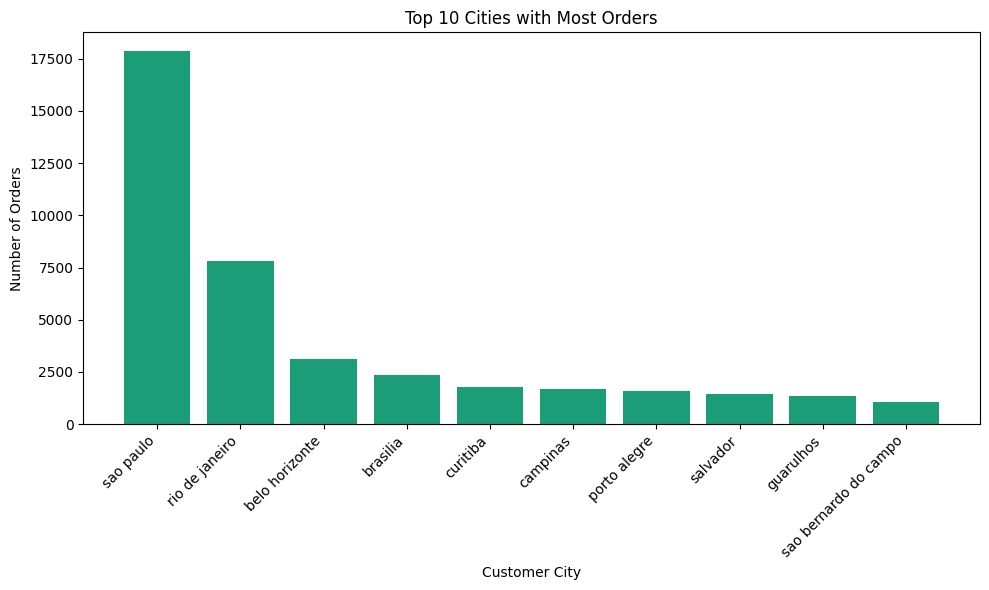

In [184]:
# Calculating customer orders per city
customer_city_orders = df.groupby('customer_city')['order_id'].count().reset_index()

# Top 10 cities with the biggest sales
top_10_cities = customer_city_orders.nlargest(10, 'order_id')

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['order_id'])

plt.xlabel('Customer City')
plt.ylabel('Number of Orders')
plt.title('Top 10 Cities with Most Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

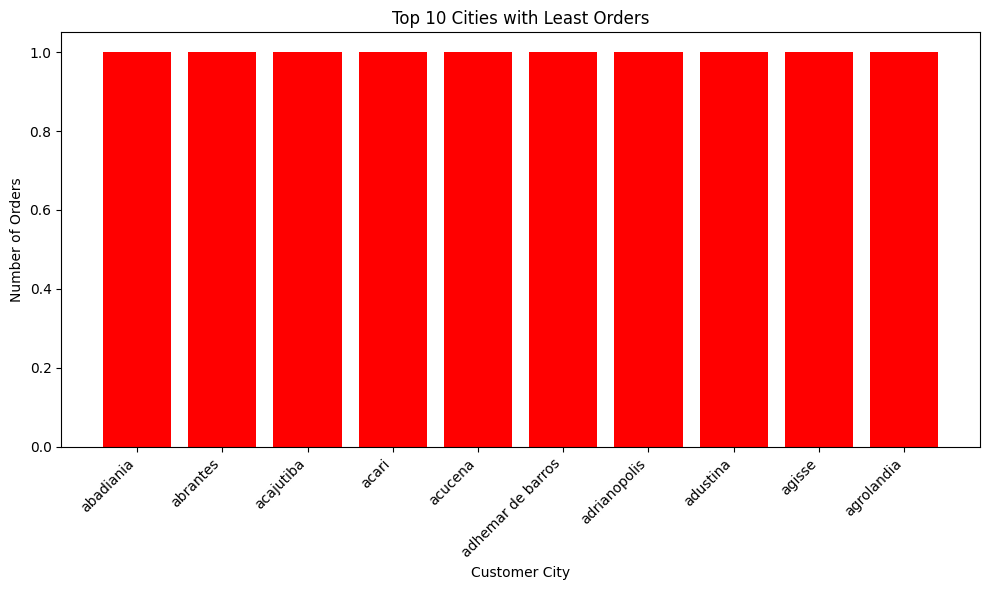

In [185]:
# top 10 cities with the smallest sales
top_10_cities_small = customer_city_orders.nsmallest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities_small['customer_city'], top_10_cities_small['order_id'],color='red')

plt.xlabel('Customer City')
plt.ylabel('Number of Orders')
plt.title('Top 10 Cities with Least Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

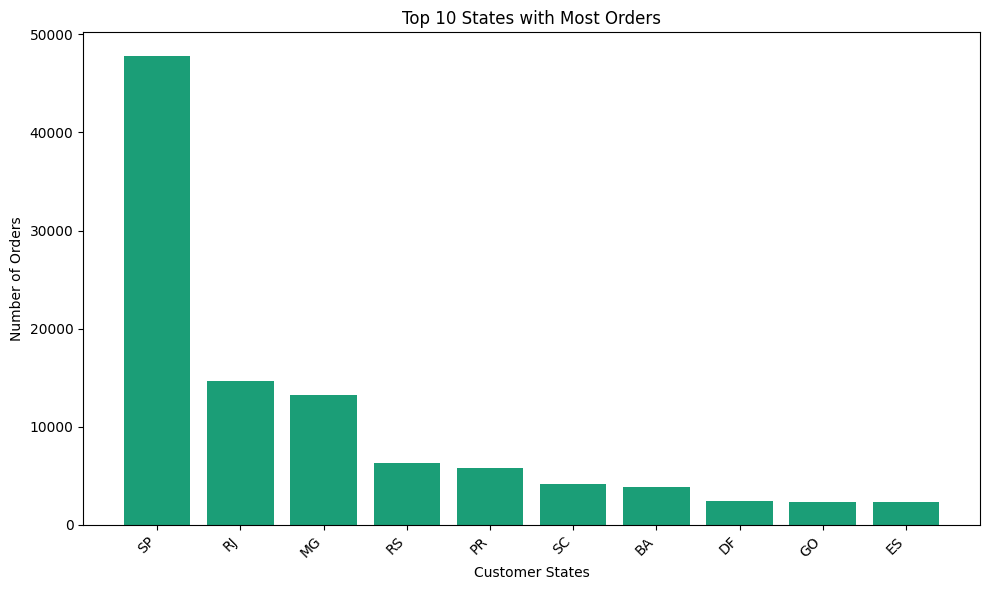

In [186]:
# Calculating customer orders per state
customer_states_orders = df.groupby('customer_state')['order_id'].count().reset_index()

# Top 10 states with the most sales
top_10_states = customer_states_orders.nlargest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['customer_state'], top_10_states['order_id'])

plt.xlabel('Customer States')
plt.ylabel('Number of Orders')
plt.title('Top 10 States with Most Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

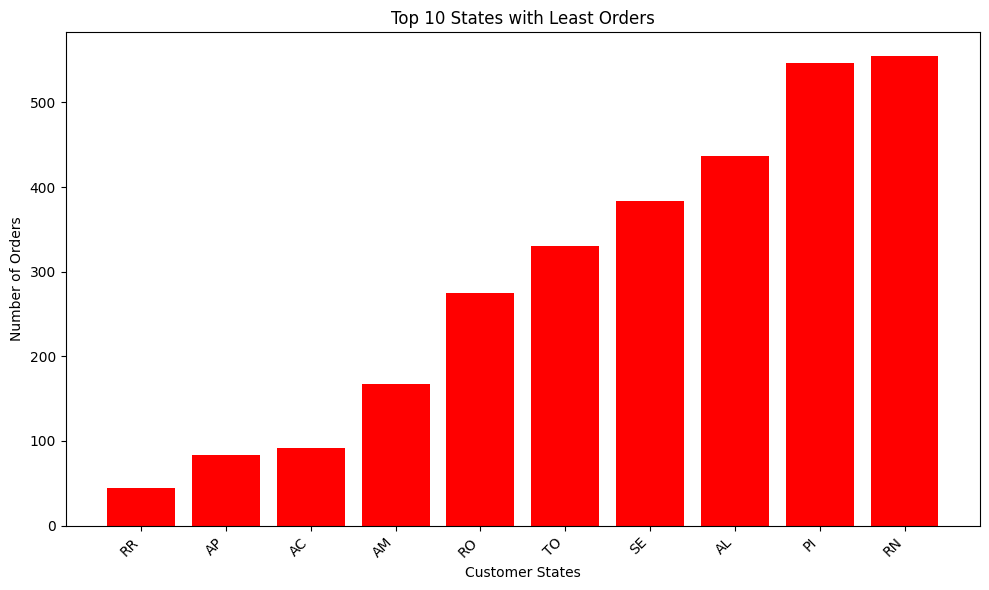

In [187]:
# Calculating customer orders per state
customer_states_orders = df.groupby('customer_state')['order_id'].count().reset_index()

# Top 10 states with the least sales
top_10_states = customer_states_orders.nsmallest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['customer_state'], top_10_states['order_id'], color='red')

plt.xlabel('Customer States')
plt.ylabel('Number of Orders')
plt.title('Top 10 States with Least Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insights**

- Among all customers, the customer with id 270c23a11d024a44c896d1894b261a83 made the most transactions (63 transactions). After that, there are at least 9 other customers who made more than 20 transactions in this period.

- There were also at least 10 customers who only made 1 transaction during this period.
- There were about 17,500 incoming orders from customers in Sao Paulo. This is the largest number among the other cities with less than 10,000 orders in each city.
- Due to the lack of customers in cities such as Abadiania, Acari, and Agisse, the number of orders in these cities is also the lowest (1 order per city).
- State SP holds the position as the state with the highest number of orders, with more than 45,000 orders received. In the second-ranked state of RJ, the number of orders was around 15,000.
- Of all the states, RR received the least number of orders with less than 100 orders.

### Sellers in Each City (Which city has the most sellers?)

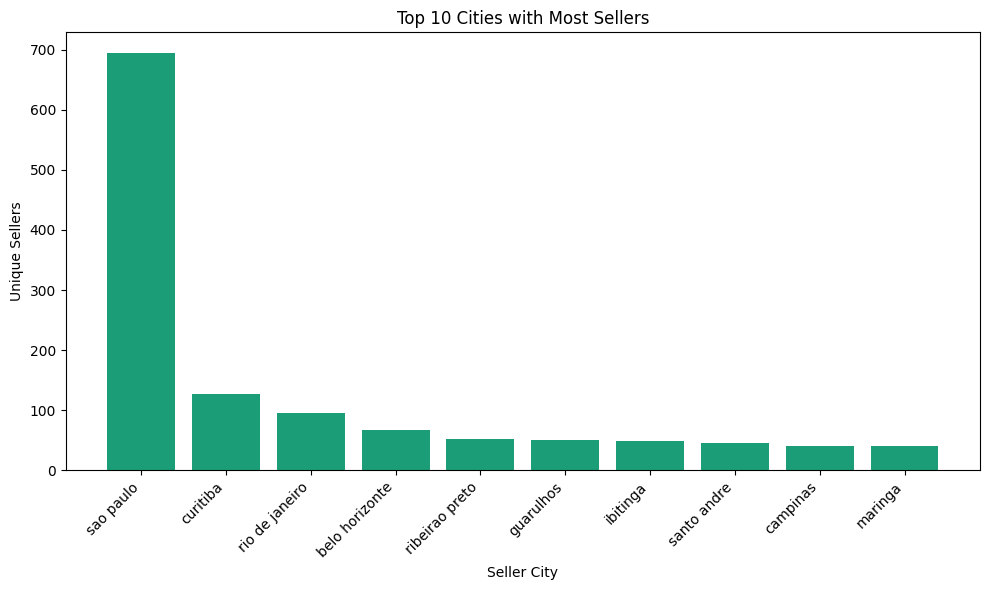

In [188]:
# Sellers in each city
seller_city = sellers.groupby('seller_city')['seller_id'].count().reset_index()

# Cities with the most sellers (hometown)
top_10_cities = seller_city.nlargest(10, 'seller_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['seller_city'], top_10_cities['seller_id'])

plt.xlabel('Seller City')
plt.ylabel('Unique Sellers')
plt.title('Top 10 Cities with Most Sellers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

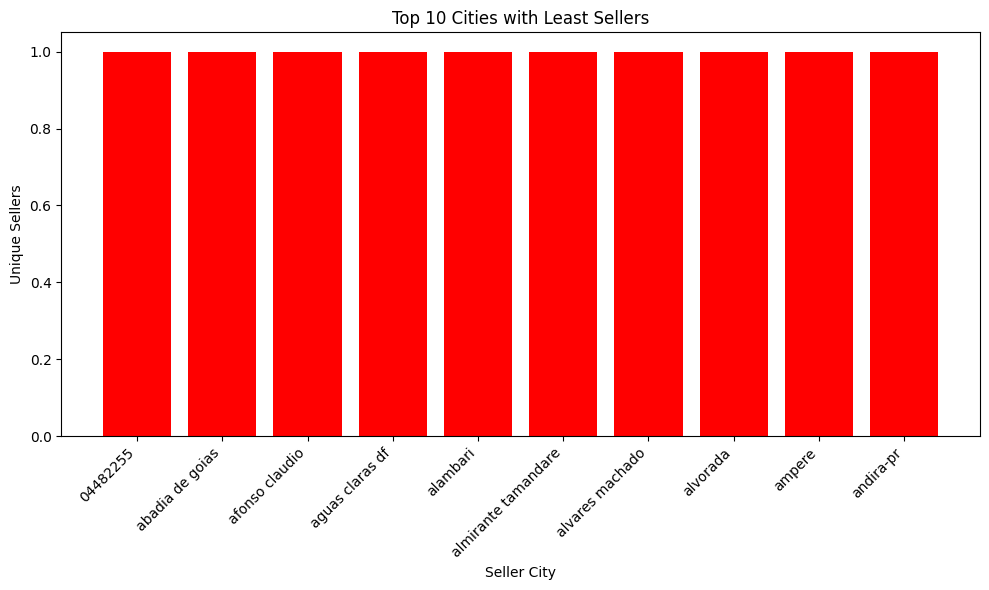

In [189]:
# Cities with the fewest sellers (home city)
top_10_cities = seller_city.nsmallest(10, 'seller_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['seller_city'], top_10_cities['seller_id'], color ='red')

plt.xlabel('Seller City')
plt.ylabel('Unique Sellers')
plt.title('Top 10 Cities with Least Sellers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**

- The largest number of sellers is also in the city of Sao Paulo with around 700 sellers.

- There are some cities that only have 1 seller, such as the cities of Abadia de Goias, Alambari, Ampere, etc.

### Sellers and Orders (How many orders did the seller receive?)

<ipython-input-190-bf01fe8d655f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')


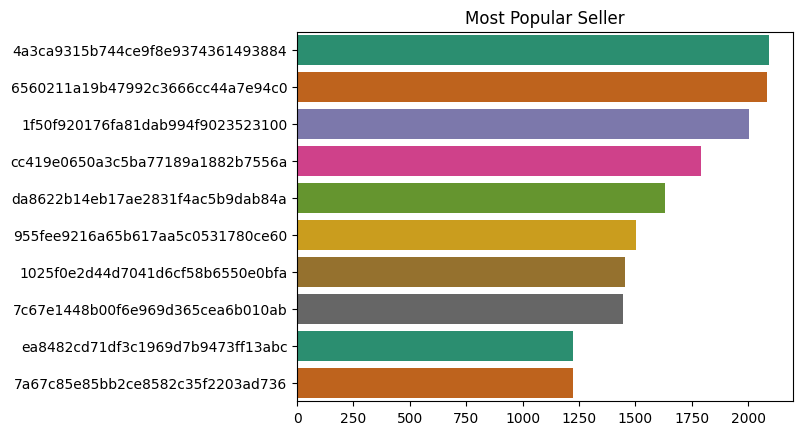

<Figure size 1000x2000 with 0 Axes>

In [190]:
# Univariate analysis to see the best-selling sellers
data_plot  = df['seller_id'].value_counts()[:10].to_list()
label_plot = df['seller_id'].value_counts()[:10].index.to_list()

title = 'Most Popular Seller'

plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')
plot_title = plt.title(title)

fig = plt.figure(figsize=(10, 20))
plt.show()

In [191]:
# The best-selling sellers based on the number of orders
df.groupby(by="seller_id").order_id.count().sort_values(ascending=False)

seller_id
4a3ca9315b744ce9f8e9374361493884    2094
6560211a19b47992c3666cc44a7e94c0    2085
1f50f920176fa81dab994f9023523100    2002
cc419e0650a3c5ba77189a1882b7556a    1790
da8622b14eb17ae2831f4ac5b9dab84a    1633
                                    ... 
dbc51f5e45d654ecc16cb68e6817ecea       1
5415337f1863452476d42d9f14a16a61       1
2c9005d8043aff18b8557ffb7b13cda4       1
db7ed69a53aa9fb1c01930ba54a88bbe       1
499185655c29ecfdbfe776ef7cf875b5       1
Name: order_id, Length: 2912, dtype: int64

**Insight**

- Seller with id 4a3ca9315b744ce9f8e9374361493884 is the most popular seller with 2094 orders received.

- There are some less popular sellers with only 1 order, such as seller with id 499185655c29ecfdbfe776ef7cf875b5.

### Sales and Revenue Performance in Recent Months

In [192]:
# Retrieve the month and year from the date when the order was approved
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['YearMonth'] = df['order_approved_at'].dt.to_period('M')

# Number of orders and revenue per month
monthly_orders_df = df.groupby(by="YearMonth").agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df

,order_count,revenue
YearMonth,,
2016-10,268,42230.08
2016-12,1,10.90
2017-01,704,111545.68
2017-02,1592,237664.10
2017-03,2502,371307.40
2017-04,2215,347772.06
2017-05,3469,518524.01
2017-06,3090,440400.57
2017-07,3781,506315.60


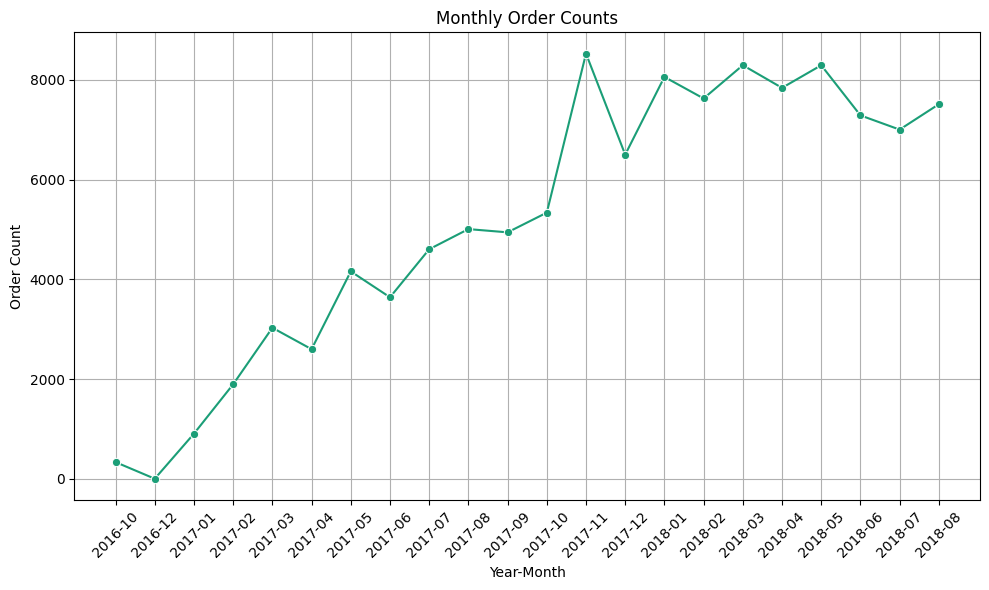

In [193]:
# Categorize and count orders by date and month
monthly_counts = df.groupby('YearMonth')['order_id'].count()

# Create line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.title('Monthly Order Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

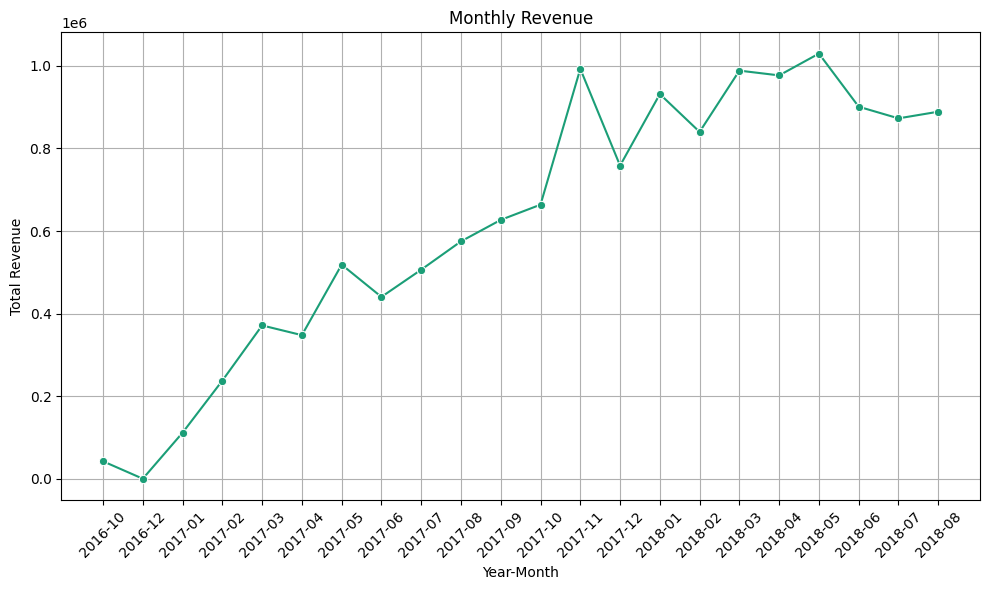

In [194]:
# Categorize and calculate revenue orders by date and month
monthly_counts = df.groupby('YearMonth')['price'].sum()

# Create line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**

- The highest number of orders received in a month during this period was 7051, in November 2017.
- While the least number of orders in a month occurred in December 2016 with only 1 order.
- Regarding the revenue earned, May 2018 was the month with the highest revenue of US$1,029,731.39.

- Due to the small number of orders, December 2016 was also the month with the lowest revenue at US$10.90.

### Products and Sales (What products sold the most and least?)

#### Per Product

In [195]:
# Calculate the order of each product
product_orders = df.groupby('product_id')['order_id'].count().reset_index()

In [196]:
# View best-selling products
df.groupby(by="product_id").order_id.count().sort_values(ascending=False)[:10]

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    529
99a4788cb24856965c36a24e339b6058    513
422879e10f46682990de24d770e7f83d    505
389d119b48cf3043d311335e499d9c6b    403
368c6c730842d78016ad823897a372db    395
53759a2ecddad2bb87a079a1f1519f73    389
d1c427060a0f73f6b889a5c7c61f2ac4    346
53b36df67ebb7c41585e8d54d6772e08    325
3dd2a17168ec895c781a9191c1e95ad7    276
154e7e31ebfa092203795c972e5804a6    276
Name: order_id, dtype: int64

In [197]:
# View products that are not selling well
df.groupby(by="product_id").order_id.count().sort_values(ascending=True)[:10]

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
8f8e98cf133d4ab9a74486c3ce81da02    1
8f8e77fd044480226cd55c1ebb9df34a    1
8f8c372264024a67ef0c7b449241e65f    1
8f8ba9033e26050d48ea1e8807e8cc8e    1
8f87e8e0a393ebf8373a52dc1b27c5fc    1
8f840e793958e7522d3421524b07ee4b    1
8f79800a347de2da5104a414bc791a0b    1
8f73a652972eef397960af15ad4ddc10    1
8f73613d06e3a557da0249015cbae6b6    1
Name: order_id, dtype: int64

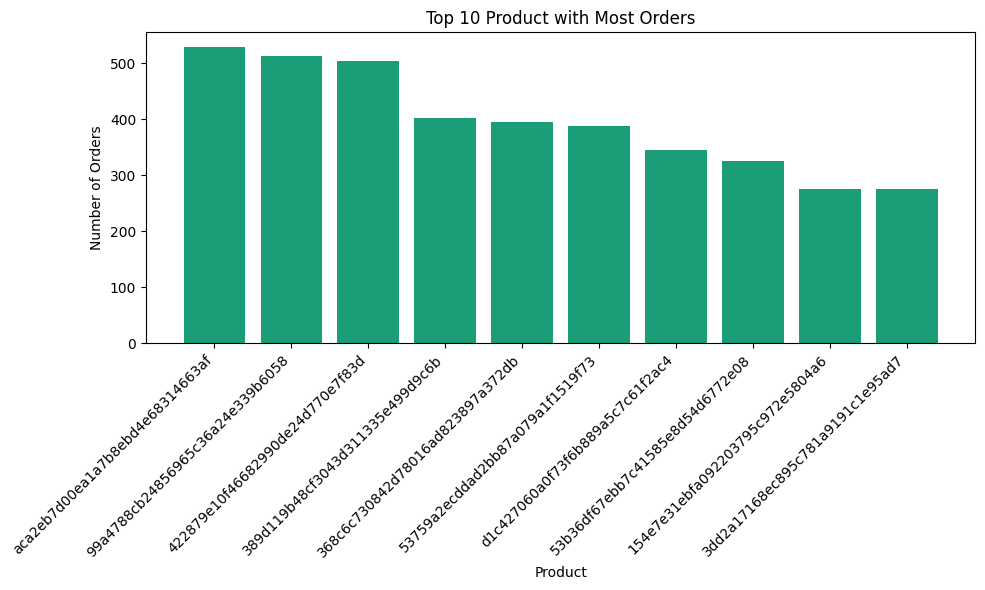

In [198]:
# Top 10 best-selling products
top_10_product = product_orders.nlargest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_product['product_id'], top_10_product['order_id'])

plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.title('Top 10 Product with Most Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

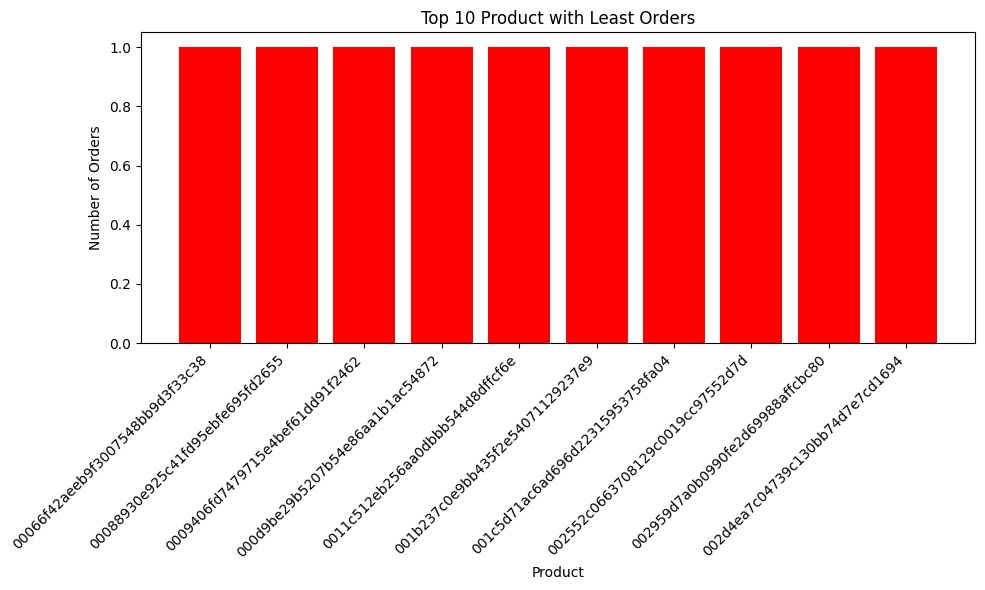

In [199]:
# Top 10 under-selling products
top_10_product = product_orders.nsmallest(10, 'order_id')

plt.figure(figsize=(10, 6))
plt.bar(top_10_product['product_id'], top_10_product['order_id'], color='red')

plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.title('Top 10 Product with Least Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [200]:
# Most profitable products
df.groupby(by="product_id").price.sum().sort_values(ascending=False)[:10]

product_id
bb50f2e236e5eea0100680137654686c    68160.00
6cdd53843498f92890544667809f1595    54702.00
d6160fb7873f184099d9bc95e30376af    53998.84
d1c427060a0f73f6b889a5c7c61f2ac4    47547.45
99a4788cb24856965c36a24e339b6058    45243.16
25c38557cf793876c5abdd5931f922db    44829.32
3dd2a17168ec895c781a9191c1e95ad7    41382.40
53b36df67ebb7c41585e8d54d6772e08    37929.42
aca2eb7d00ea1a7b8ebd4e68314663af    37743.60
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
Name: price, dtype: float64

In [201]:
# Least profitable products
df.groupby(by="product_id").price.sum().sort_values(ascending=True)[:10]

product_id
310dc32058903b6416c71faff132df9e    2.29
8a3254bee785a526d548a81a9bc3c9be    2.55
680cc8535be7cc69544238c1d6a83fe8    2.90
2e8316b31db34314f393806fd7b6e185    2.99
eee2fb3dceb9ffd8a99dd4bc4b7e860a    3.90
836c4b48c2b383bb38bb5788f828c596    3.90
66389c9df136a25c8f131757ce3a6967    3.99
46fce52cef5caa7cc225a5531c946c8b    4.40
da86f3242cb55a55dd9cd7b19d951685    4.50
9cf02957cdf023b6b8dfebede6c64755    5.31
Name: price, dtype: float64

In [202]:
# Calculating the amount of order revenue per product
product_orders = df.groupby('product_id')['price'].sum().reset_index()

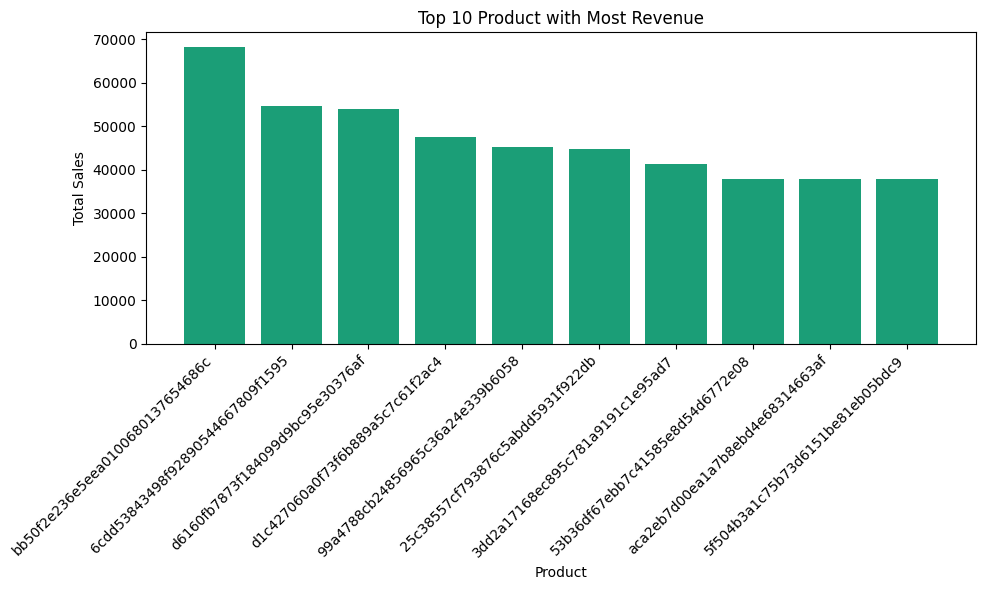

In [203]:
# Top 10 best-selling products
top_10_product = product_orders.nlargest(10, 'price')

plt.figure(figsize=(10, 6))
plt.bar(top_10_product['product_id'], top_10_product['price'])

plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Product with Most Revenue')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

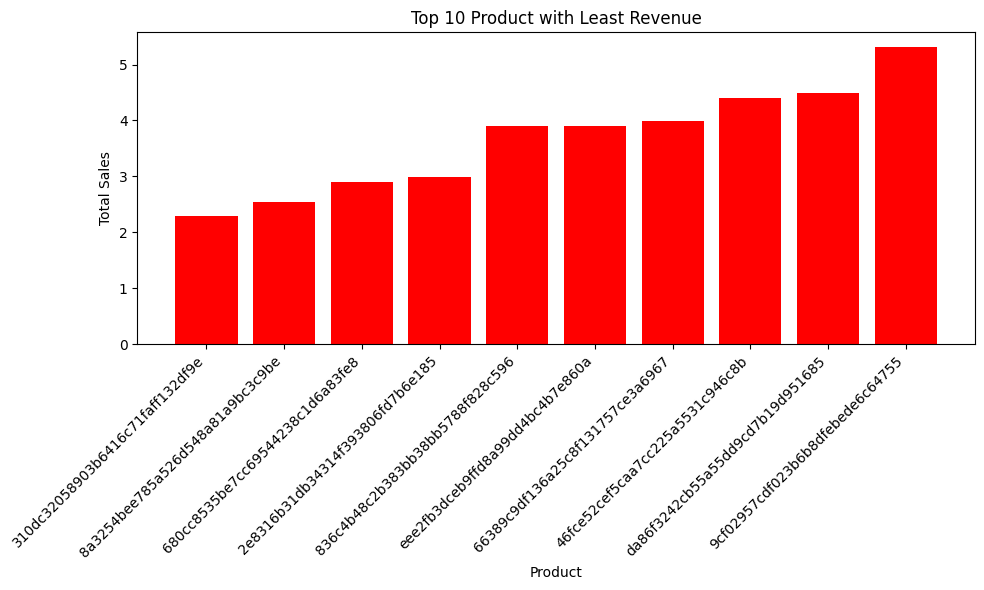

In [204]:
# Top 10 under-selling products
top_10_product = product_orders.nsmallest(10, 'price')

plt.figure(figsize=(10, 6))
plt.bar(top_10_product['product_id'], top_10_product['price'], color='red')

plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Product with Least Revenue')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**

- The product with id aca2eb7d00ea1a7b8ebd4e68314663af is the most popular product with 529 orders.
- There are at least 10 products that are less in demand with only 1 item sold such as product with id 00066f42aeeb9f3007548bb9d3f33c38.
- The product that generated the most revenue was the product with id bb50f2e236e5eea0100680137654686c with an income of US$68,160.

- There are some products that are less profitable such as product with id 310dc32058903b6416c71faff132df9e with revenue of only US$2.29.

#### Per Category

In [205]:
# Best-selling product categories
df.groupby(by="product_category_name").order_id.count().sort_values(ascending=False)[:10]

product_category_name
bed_bath_table           11649
health_beauty             9761
sports_leisure            8731
furniture_decor           8553
computers_accessories     7897
housewares                7172
watches_gifts             6063
telephony                 4601
garden_tools              4463
auto                      4283
Name: order_id, dtype: int64

In [206]:
# Least selling product categories
df.groupby(by="product_category_name").order_id.count().sort_values(ascending=True)[:10]

product_category_name
security_and_services                 2
fashion_childrens_clothes             7
cds_dvds_musicals                    14
la_cuisine                           16
arts_and_craftmanship                24
fashion_sport                        29
home_comfort_2                       31
flowers                              33
diapers_and_hygiene                  37
furniture_mattress_and_upholstery    40
Name: order_id, dtype: int64

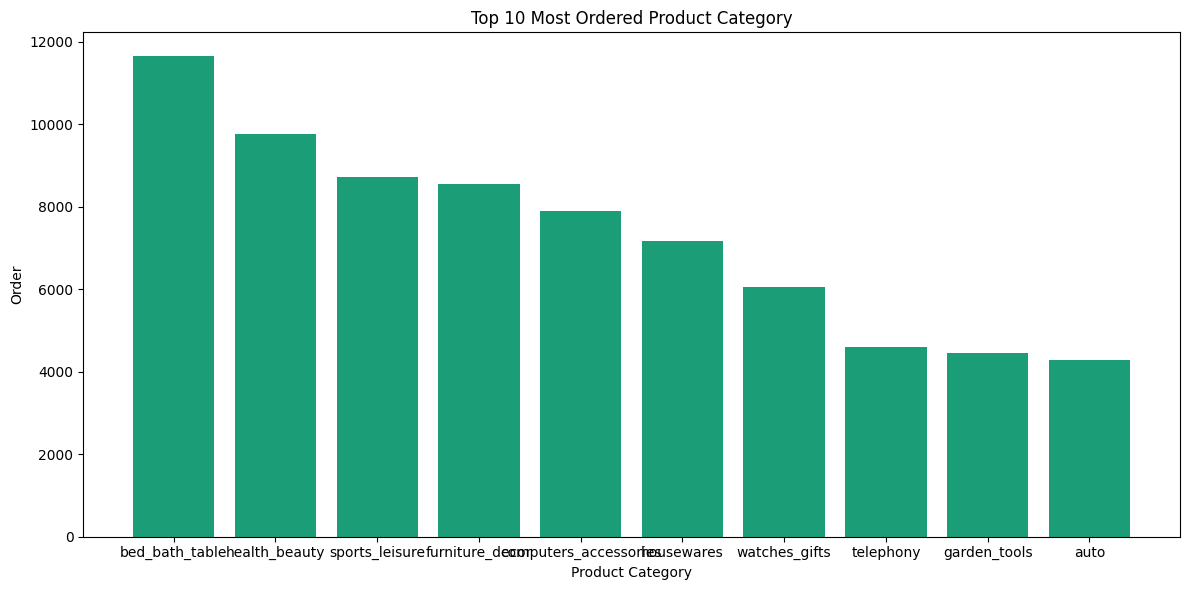

In [207]:
# Calculating the number of orders per product category
product_cat_orders = df.groupby('product_category_name')['order_id'].count().reset_index()

# Get top 10 product categories
top_10_products_cat = product_cat_orders.nlargest(10, 'order_id')

plt.figure(figsize=(12, 6))
plt.bar(top_10_products_cat['product_category_name'], top_10_products_cat['order_id'])

plt.xlabel('Product Category')
plt.ylabel('Order')
plt.title('Top 10 Most Ordered Product Category')

plt.tight_layout()
plt.show()

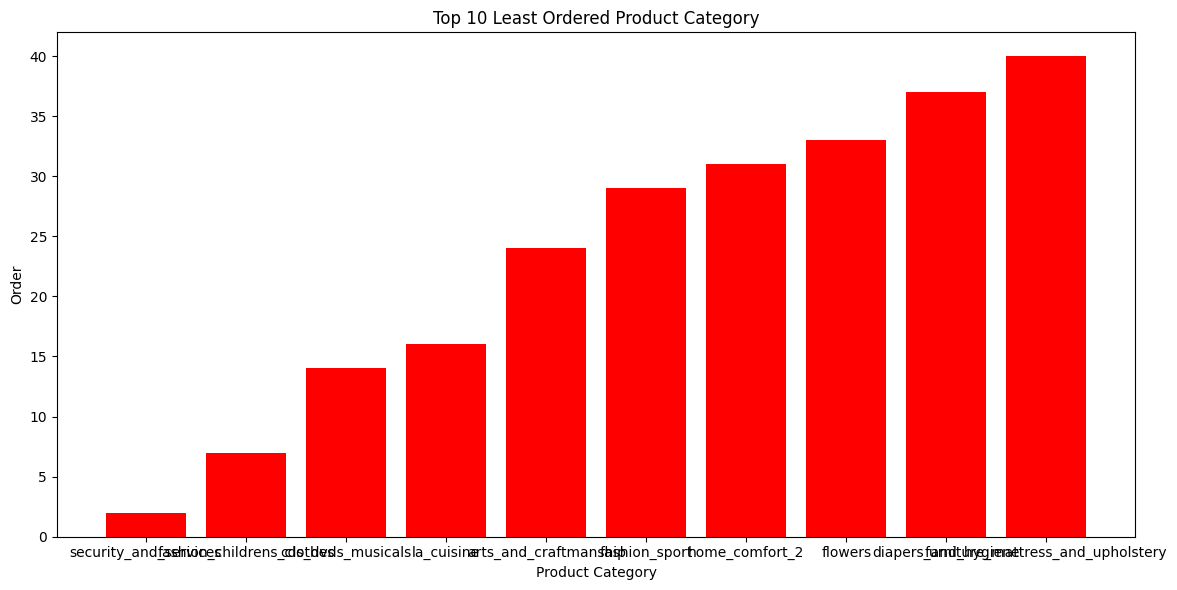

In [208]:
# Get top 10 under-selling product categories
top_10_products_cat = product_cat_orders.nsmallest(10, 'order_id')

plt.figure(figsize=(12, 6))
plt.bar(top_10_products_cat['product_category_name'], top_10_products_cat['order_id'], color='red')

plt.xlabel('Product Category')
plt.ylabel('Order')
plt.title('Top 10 Least Ordered Product Category')

plt.tight_layout()
plt.show()

In [209]:
# Looking at the most profitable product categories
df.groupby(by="product_category_name").price.sum().sort_values(ascending=False)[:10]

product_category_name
health_beauty            1271413.18
watches_gifts            1213162.80
bed_bath_table           1077834.14
sports_leisure            990417.74
computers_accessories     918837.87
furniture_decor           745748.80
housewares                648187.74
cool_stuff                634163.78
auto                      602881.75
garden_tools              492255.08
Name: price, dtype: float64

In [210]:
# Looking at the least profitable product categories
df.groupby(by="product_category_name").price.sum().sort_values(ascending=True)[:10]

product_category_name
security_and_services         283.29
fashion_childrens_clothes     519.95
cds_dvds_musicals             730.00
home_comfort_2                773.17
flowers                      1110.04
diapers_and_hygiene          1500.79
arts_and_craftmanship        1814.01
fashion_sport                2094.52
la_cuisine                   2303.98
fashio_female_clothing       2634.94
Name: price, dtype: float64

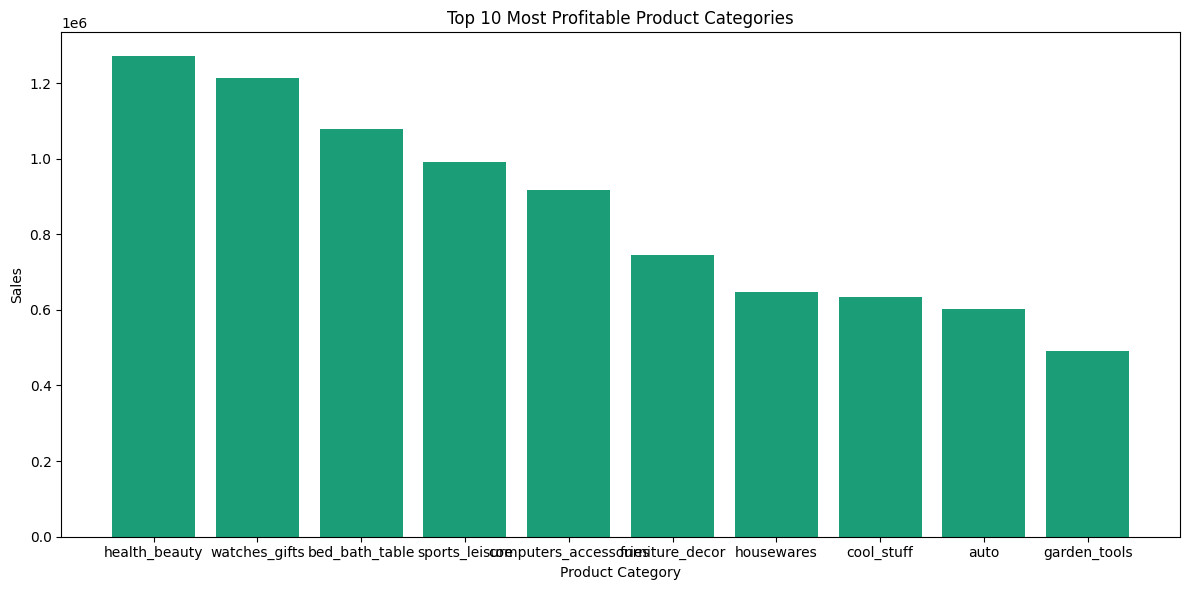

In [211]:
# Calculating the number of revenue orders per product category
product_cat_orders = df.groupby('product_category_name')['price'].sum().reset_index()

# Get top 10 product categories
top_10_products_cat = product_cat_orders.nlargest(10, 'price')

plt.figure(figsize=(12, 6))
plt.bar(top_10_products_cat['product_category_name'], top_10_products_cat['price'])

plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Top 10 Most Profitable Product Categories')

plt.tight_layout()
plt.show()

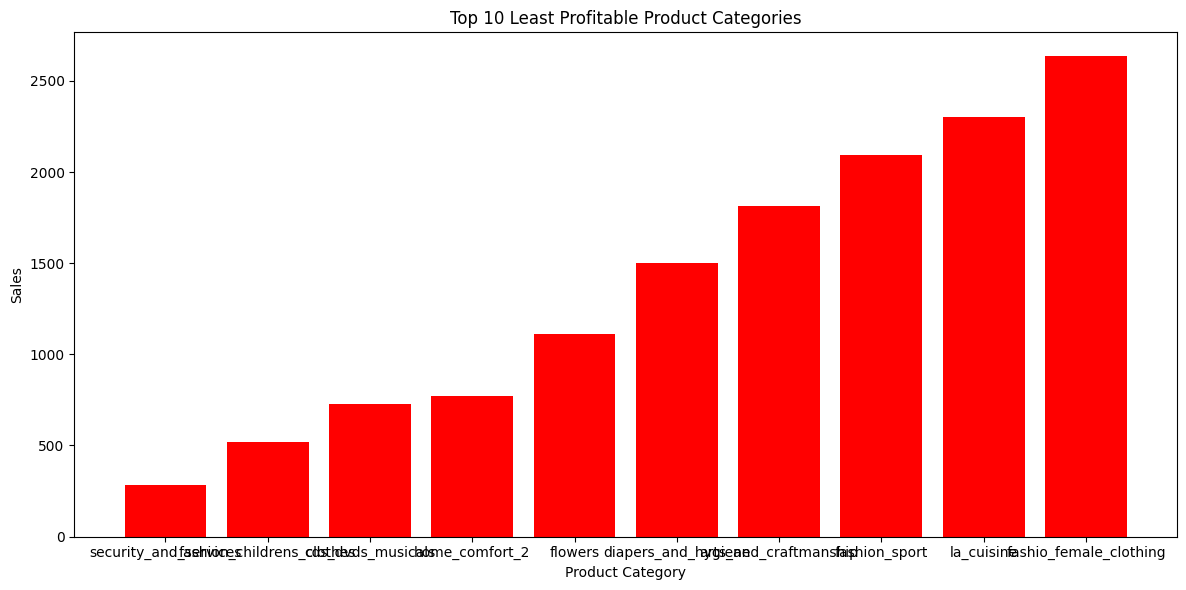

In [212]:
# Top 10 least profitable product categories
top_10_products_cat = product_cat_orders.nsmallest(10, 'price')

plt.figure(figsize=(12, 6))
plt.bar(top_10_products_cat['product_category_name'], top_10_products_cat['price'], color='red')

plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Top 10 Least Profitable Product Categories')

plt.tight_layout()
plt.show()

**Insight**

- The bed_bath_table category products are the most popular with customers, as seen from the highest number of orders at 11,649.
- The bed_bath_security_and_services category products are the least popular with customers, as seen from the number of orders of only 2 orders.
- In terms of revenue, the health_beauty category holds the highest revenue position at US$1,271,413.18.

- As for the category with the least revenue, security_and_services only earned US$283.29. This is in line with its smallest number of orders.

### Sales by City (How is the sales performance in each city?)

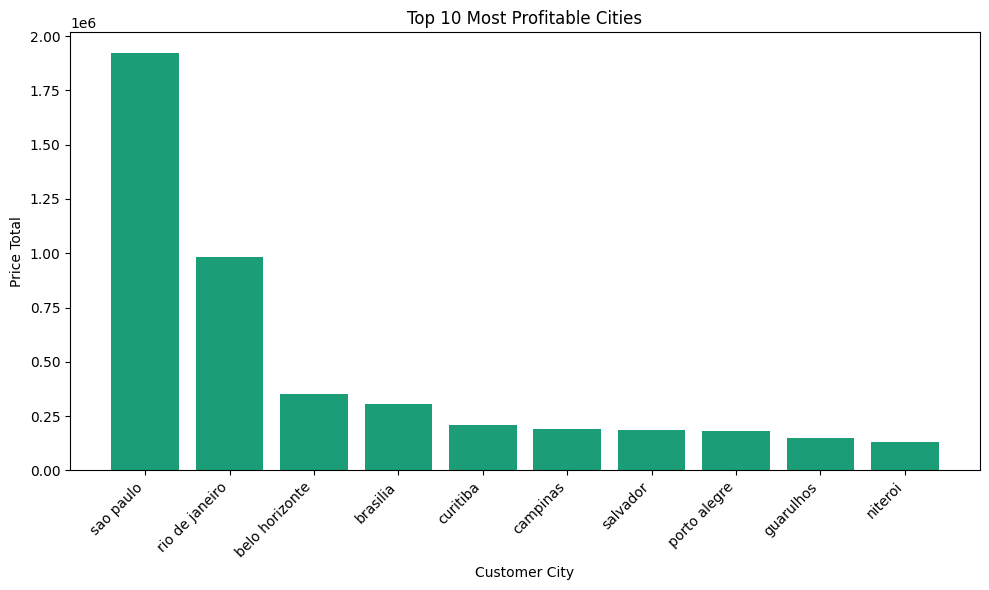

In [213]:
# Calculating the income of each city
customer_city_profit = df.groupby('customer_city')['price'].sum().reset_index()

#10 cities with the highest income
top_10_cities = customer_city_profit.nlargest(10, 'price')  # Select top 10 rows based on 'order_id'

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['price'])

plt.xlabel('Customer City')
plt.ylabel('Price Total')
plt.title('Top 10 Most Profitable Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

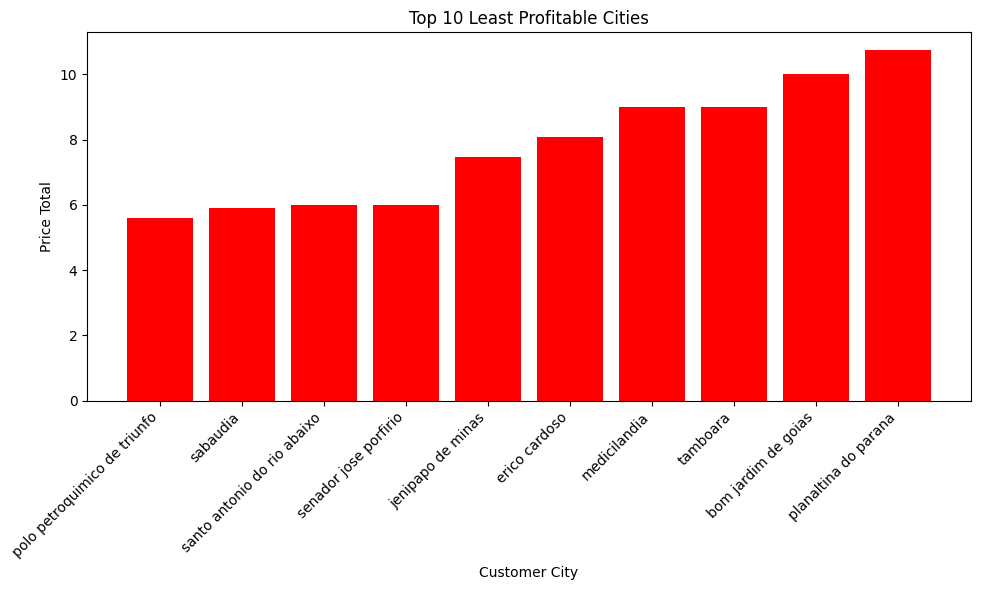

In [214]:
# Cities with the least sales
top_10_cities = customer_city_profit.nsmallest(10, 'price')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['price'], color='red')

plt.xlabel('Customer City')
plt.ylabel('Price Total')
plt.title('Top 10 Least Profitable Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**

- The city with the most revenue is Sao Paulo. This can be attributed to the number of customers and sellers in this city. Revenue in this city was almost US$2 million.

- The city with the least revenue is Polo Petroquimico de Triunfo with less than US$6.

### Product Category Sales per State (How are sales performing in each state?)

In [215]:
df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_id": "count",
    "price": "sum"
})

order_id    price
customer_state product_category_name                    
AC             auto                           5   606.97
               baby                           3   697.84
               bed_bath_table                 4   567.70
               books_general_interest         2   633.80
               christmas_supplies             1    69.90
...                                         ...      ...
TO             sports_leisure                26  5533.32
               stationery                     3   276.80
               telephony                     21  1268.12
               toys                          13  1864.15
               watches_gifts                 29  4920.89

[1351 rows x 2 columns]

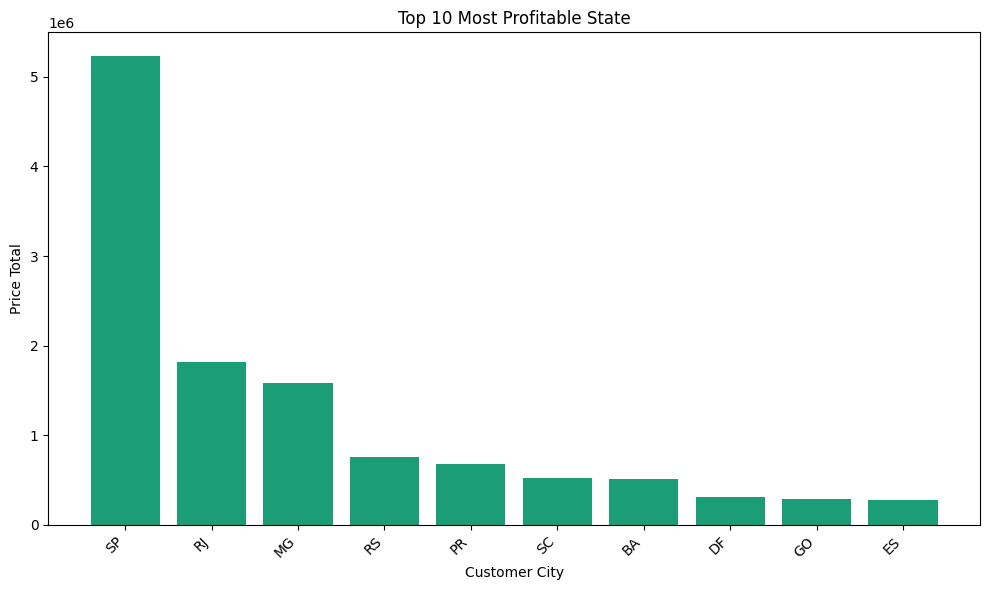

In [216]:
# Calculating the income of each state
customer_state_profit = df.groupby('customer_state')['price'].sum().reset_index()

#10 cities with the highest income
top_10_states= customer_state_profit.nlargest(10, 'price')  # Select top 10 rows based on 'order_id'

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['customer_state'], top_10_states['price'])

plt.xlabel('Customer City')
plt.ylabel('Price Total')
plt.title('Top 10 Most Profitable State')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

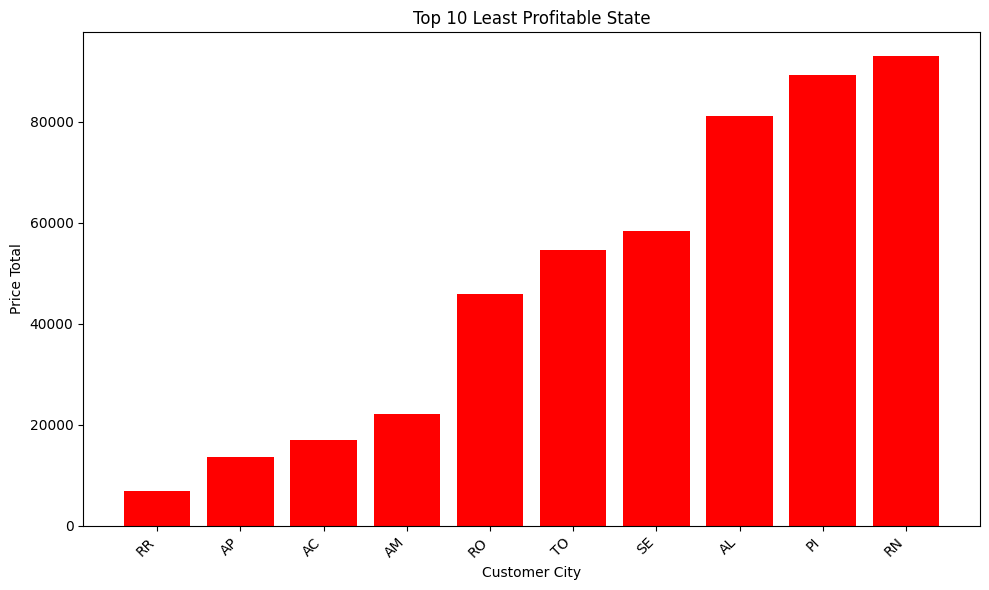

In [217]:
# States with the least sales
top_10_states = customer_state_profit.nsmallest(10, 'price')

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['customer_state'], top_10_states['price'], color='red')

plt.xlabel('Customer City')
plt.ylabel('Price Total')
plt.title('Top 10 Least Profitable State')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insights**

- State SP holds the position as the state with the highest revenue, with more than US$5 millions revenue.

- Of all the states, RR got the least revenue, not even reaching US$10k.

### Payment (How is the customer behavior in making payments?)

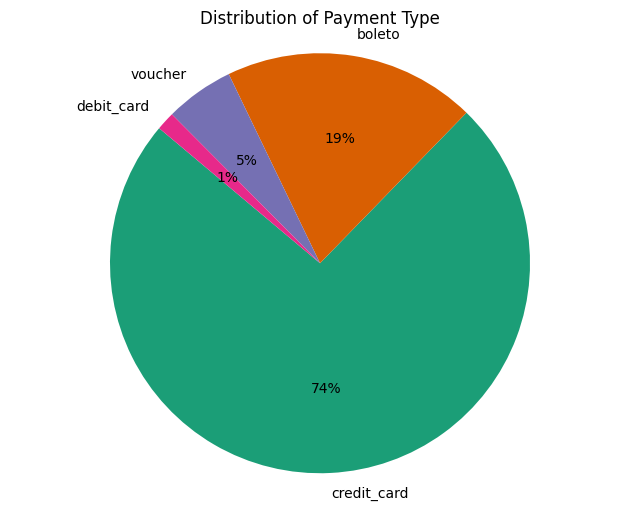

In [218]:
palet_warna = sns.color_palette('Dark2')

# Calculating the number of orders per payment type
pymnt_type_counts = df['payment_type'].value_counts().sort_values(ascending=False)  # Sort by frequency (descending)

plt.figure(figsize=(8, 6))
sns.set_palette(palet_warna)
plot = plt.pie(pymnt_type_counts, labels=pymnt_type_counts.index, autopct='%.0f%%', startangle=140)

plt.title('Distribution of Payment Type')
plt.axis('equal')

plt.show()

<ipython-input-219-b0a8d4a51b4f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'Dark2')


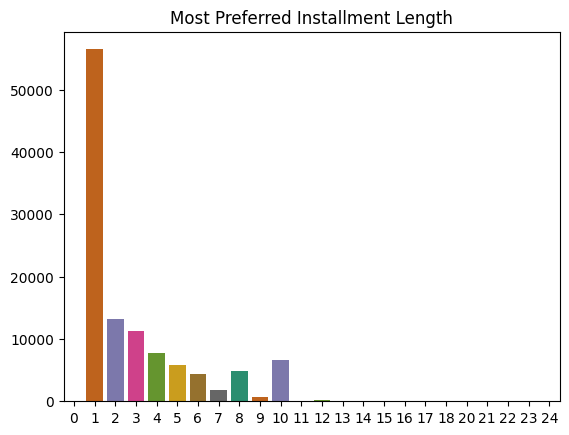

<Figure size 1000x2000 with 0 Axes>

In [219]:
#Univariate analysis to see the length of installments that are often chosen
data_plot  = df['payment_installments'].value_counts().to_list()
label_plot = df['payment_installments'].value_counts().index.to_list()

title = 'Most Preferred Installment Length'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'Dark2')
plot_title = plt.title(title)

fig = plt.figure(figsize=(10, 20))
plt.show()

In [220]:
# Calculating the average length of the shortest installment per product category
avg_payment_per_category = df.groupby('product_category_name')['payment_installments'].mean().sort_values(ascending=True)[:10].reset_index()
print(avg_payment_per_category)

       product_category_name  payment_installments
0      security_and_services              1.000000
1                    flowers              1.363636
2             home_comfort_2              1.451613
3      arts_and_craftmanship              1.750000
4                electronics              1.783399
5                     drinks              1.809264
6            home_appliances              1.949416
7  fashion_childrens_clothes              2.000000
8               dvds_blu_ray              2.000000
9                        art              2.004831


In [221]:
# Calculating the average length of the longest installment per product category
avg_payment_per_category = df.groupby('product_category_name')['payment_installments'].mean().sort_values(ascending=False)[:10].reset_index()
print(avg_payment_per_category)

                   product_category_name  payment_installments
0                              computers              5.967593
1  small_appliances_home_oven_and_coffee              5.506667
2                             la_cuisine              4.250000
3                      home_appliances_2              4.038314
4                  furniture_living_room              4.028846
5                           home_confort              4.000000
6                 fashio_female_clothing              3.955556
7                       office_furniture              3.836281
8                          watches_gifts              3.665017
9        construction_tools_construction              3.656716


**Insight**

- Most customers (74%) prefer to make payments by credit card.

- Only 1% of customers make payments via debit card.
- Most transactions have an installment period of 1 month for payment.
- The computers product category has the longest average installment duration, with around 6 months.

### Correlation of Product Weight with Shipping Price

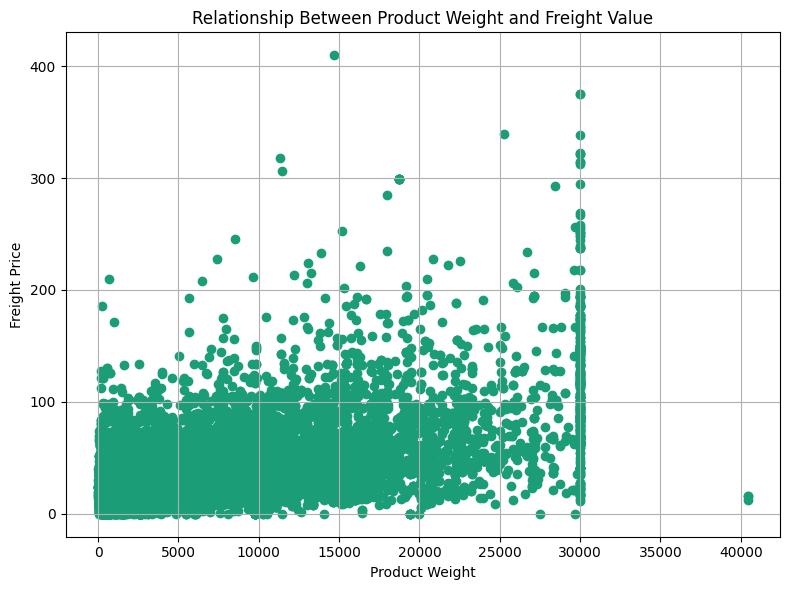

In [222]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['product_weight_g'], df['freight_value'])

plt.xlabel('Product Weight')
plt.ylabel('Freight Price')
plt.title('Relationship Between Product Weight and Freight Value')

plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**

- There is no significant correlation between product weight and shipping price.



### Order Acceptance and Delivery Time (How long does it take for the seller and expedition to process the order?)

#### Changing incorrect dates

In [223]:
# Swap order and purchase approval dates if the approve date is before the purchase date
temp = df['order_purchase_timestamp'].copy()
temp2 = df['order_approved_at'].copy()
df.loc[df['order_approved_at'] < df['order_purchase_timestamp'], 'order_purchase_timestamp'] = temp2
df.loc[df['order_approved_at'] == df['order_purchase_timestamp'], 'order_approved_at'] = temp

In [224]:
# Swap courier delivery date and customer delivery if the customer delivery date is before the carrier delivery date
temp = df['order_delivered_carrier_date'].copy()
temp2 = df['order_delivered_customer_date'].copy()
df.loc[df['order_delivered_customer_date'] < df['order_delivered_carrier_date'], 'order_delivered_carrier_date'] = temp2
df.loc[df['order_delivered_customer_date'] == df['order_delivered_carrier_date'], 'order_delivered_customer_date'] = temp

#### Average Order Approval Time

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Confirmation time is calculated from the difference between purchase and approval time
df['confirm_time'] = df['order_approved_at'] - df['order_purchase_timestamp']

# Calculating the average order approval time
average_confirm_time = df.groupby('seller_id')['confirm_time'].mean()

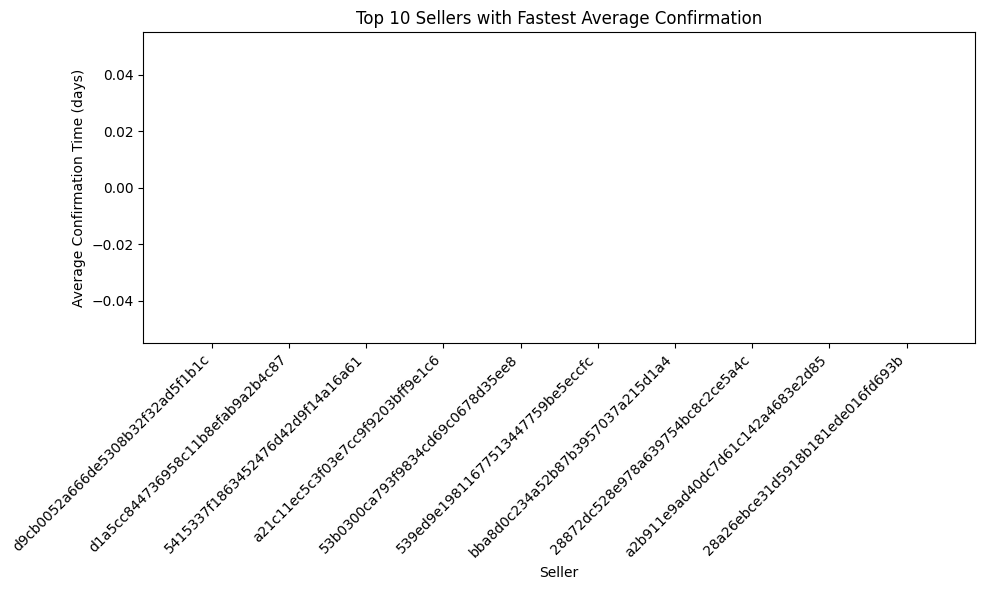

In [226]:
# Fastest sellers to approve orders
top_10_fastest_seller = average_confirm_time.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_fastest_seller.index, top_10_fastest_seller.dt.days)

plt.xlabel('Seller')
plt.ylabel('Average Confirmation Time (days)')
plt.title('Top 10 Sellers with Fastest Average Confirmation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

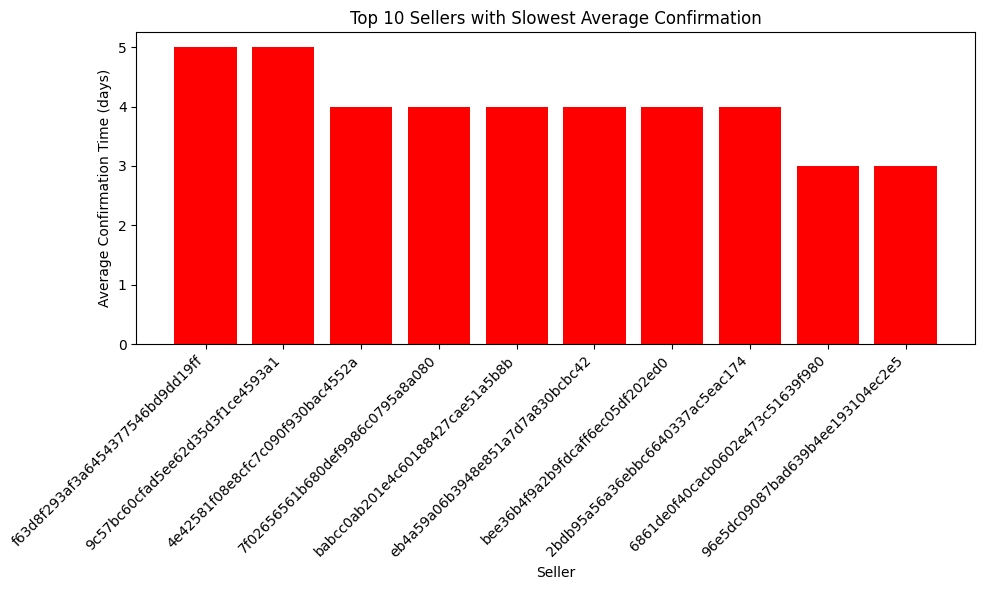

In [227]:
# Penjual paling lama menyetujui pesanan
top_10_slowest_seller = average_confirm_time.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_slowest_seller.index, top_10_slowest_seller.dt.days, color='red')

plt.xlabel('Seller')
plt.ylabel('Average Confirmation Time (days)')
plt.title('Top 10 Sellers with Slowest Average Confirmation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**

- There are some sellers who have a fast response in confirming orders, such as sellers with id d9cb0052a666de5308b32f32ad5f1b1c who take less than 1 day to confirm orders.

- There are also some sellers who take a long time to confirm orders, such as sellers with id f63d8f293af3a6454377546bd9dd19ff who take 5 days.

#### Time Distance Approved until brought to Expedition

In [228]:
# Swap courier delivery date and customer delivery if the customer delivery date is before the courier delivery date
temp = df['order_approved_at'].copy()
temp2 = df['order_delivered_carrier_date'].copy()
df.loc[df['order_delivered_carrier_date'] < df['order_approved_at'], 'order_approved_at'] = temp2
df.loc[df['order_delivered_carrier_date'] == df['order_approved_at'], 'order_delivered_carrier_date'] = temp

In [ ]:
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

# Waiting time is calculated from the difference between approval time and delivery to the courier
df['waiting_time'] = df['order_delivered_carrier_date'] - df['order_approved_at']

# Calculating the average delivery time of orders to expeditions
average_waiting_time = df.groupby('seller_id')['waiting_time'].mean()

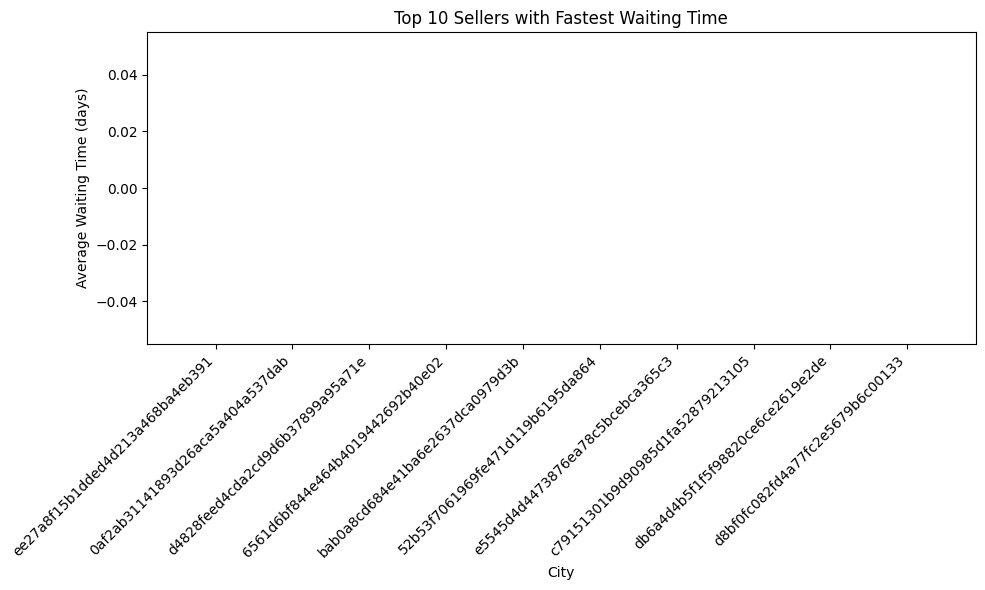

In [230]:
# The fastest seller to deliver
top_10_fastest_waiting = average_waiting_time.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_fastest_waiting.index, top_10_fastest_waiting.dt.days)

plt.xlabel('City')
plt.ylabel('Average Waiting Time (days)')
plt.title('Top 10 Sellers with Fastest Waiting Time')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

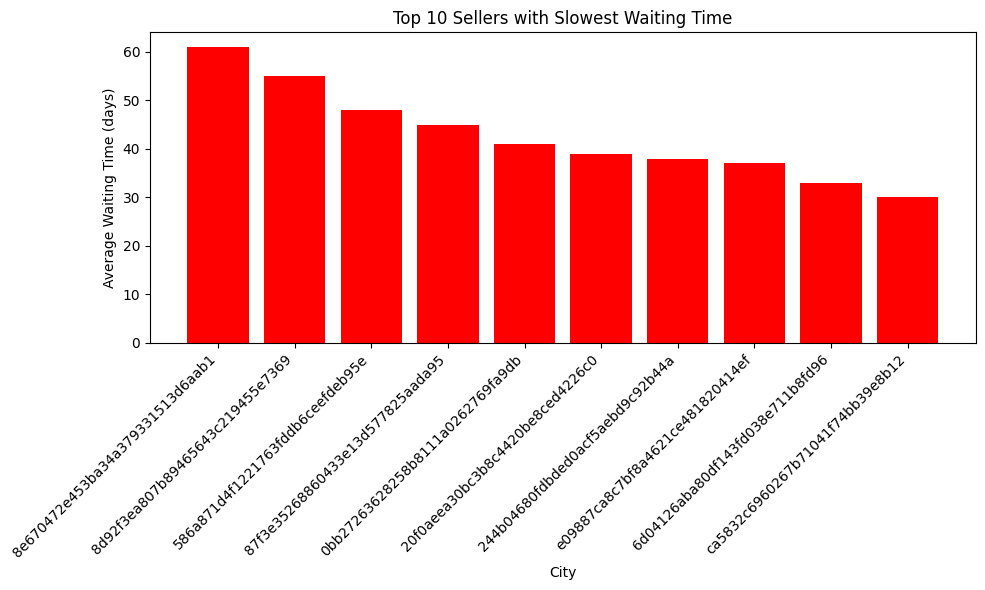

In [231]:
# The longest seller in sending goods
top_10_slowest_waiting = average_waiting_time.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_slowest_waiting.index, top_10_slowest_waiting.dt.days, color='red')

plt.xlabel('City')
plt.ylabel('Average Waiting Time (days)')
plt.title('Top 10 Sellers with Slowest Waiting Time')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**

- Some sellers have a short time interval to ship goods from the approval date, such as sellers with id ee27a8f15b1dded4d213a468ba4eb391 whose waiting time is less than one day.

- While some other sellers, such as sellers with id 8e670472e453ba34a379331513d6aab1, take a long time (60 days) to ship goods after the order is confirmed.

#### Average Delivery Time per City

In [ ]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Delivery time is calculated from the difference between the date of dropping the goods to the courier until the delivery to the customer
df['shipping_time'] = df['order_delivered_customer_date'] - df['order_delivered_carrier_date']

# Calculating the average delivery time to each city
average_shipping_time_per_city = df.groupby('customer_city')['shipping_time'].mean()

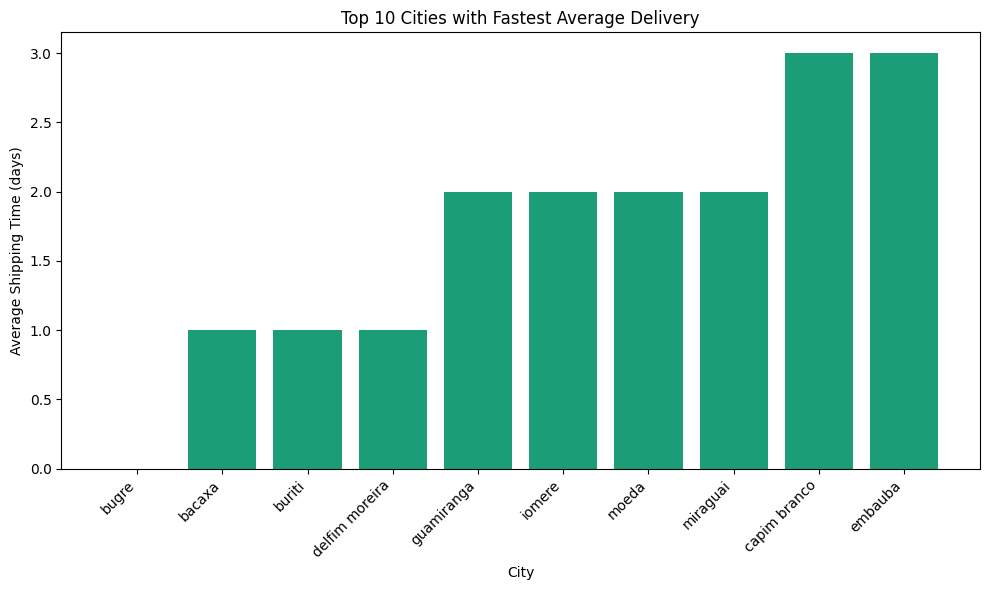

In [233]:
# Cities with the fastest average delivery
top_10_cities = average_shipping_time_per_city.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities.index, top_10_cities.dt.days)

plt.xlabel('City')
plt.ylabel('Average Shipping Time (days)')
plt.title('Top 10 Cities with Fastest Average Delivery')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

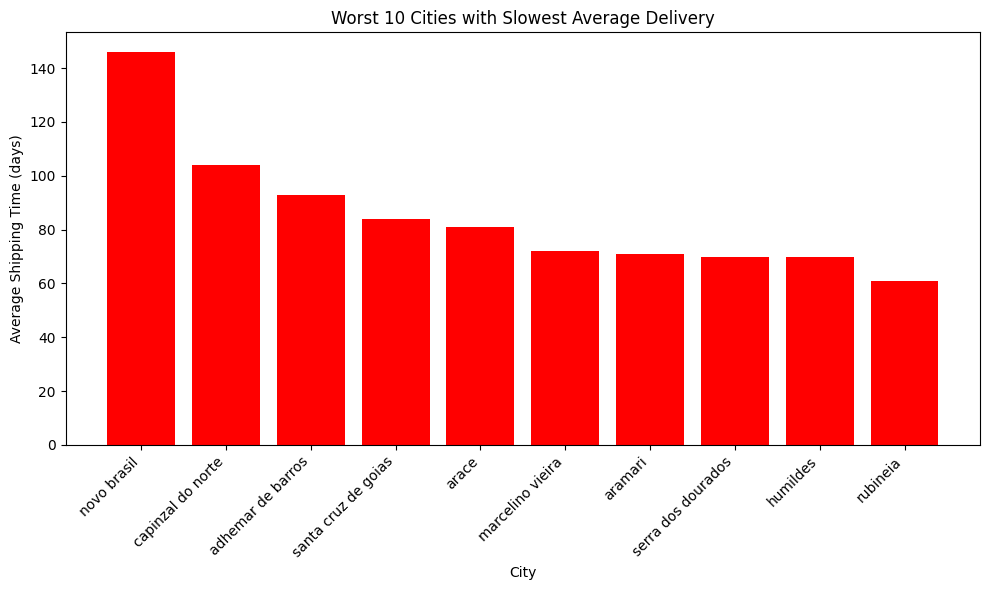

In [234]:
# Cities with the longest delivery
worst_10_cities = average_shipping_time_per_city.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(worst_10_cities.index, worst_10_cities.dt.days, color='red')

plt.xlabel('City')
plt.ylabel('Average Shipping Time (days)')
plt.title('Worst 10 Cities with Slowest Average Delivery')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**

- There are several cities where expeditions are quick to deliver to customers, such as the cities of Bugre, Bacaxa, Iomere, and Embauba, which take about 0-3 days.

- As for the cities where the expedition takes a long time to deliver to customers, there are the cities of Novo Brasil, Capinzal do Norte, Arace, etc. which take about 60-140 days.

### Review Reply Time (How long is the seller's response time in replying to reviews?)

In [235]:
review_df = df.merge(order_reviews, on='order_id')

In [236]:
# Swap review reply and review dates if the reply date is before the review date
temp = review_df['review_creation_date'].copy()
temp2 = review_df['review_answer_timestamp'].copy()
review_df.loc[review_df['review_creation_date'] < review_df['review_answer_timestamp'], 'review_answer_timestamp'] = temp2
review_df.loc[review_df['review_creation_date'] == review_df['review_answer_timestamp'], 'review_creation_date'] = temp

In [ ]:
review_df['review_answer_timestamp'] = pd.to_datetime(review_df['review_answer_timestamp'])
review_df['review_creation_date'] = pd.to_datetime(review_df['review_creation_date'])

# Review reply difference time is calculated from the difference in the date of writing the review to the reply from the seller
review_df['review_reply_time'] = review_df['review_answer_timestamp'] - review_df['review_creation_date']

# Calculating the average review reply time of each seller
average_answer_time_per_seller = review_df.groupby('seller_id')['review_reply_time'].mean()

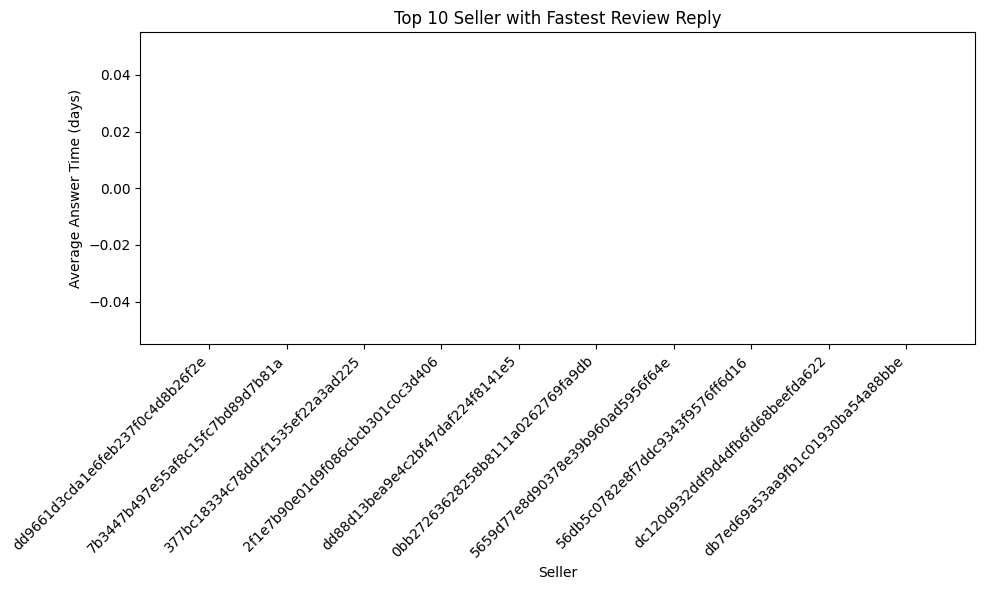

In [238]:
# Sellers with the fastest average answer
top_10_answer = average_answer_time_per_seller.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_answer.index, top_10_answer.dt.days)

plt.xlabel('Seller')
plt.ylabel('Average Answer Time (days)')
plt.title('Top 10 Seller with Fastest Review Reply')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

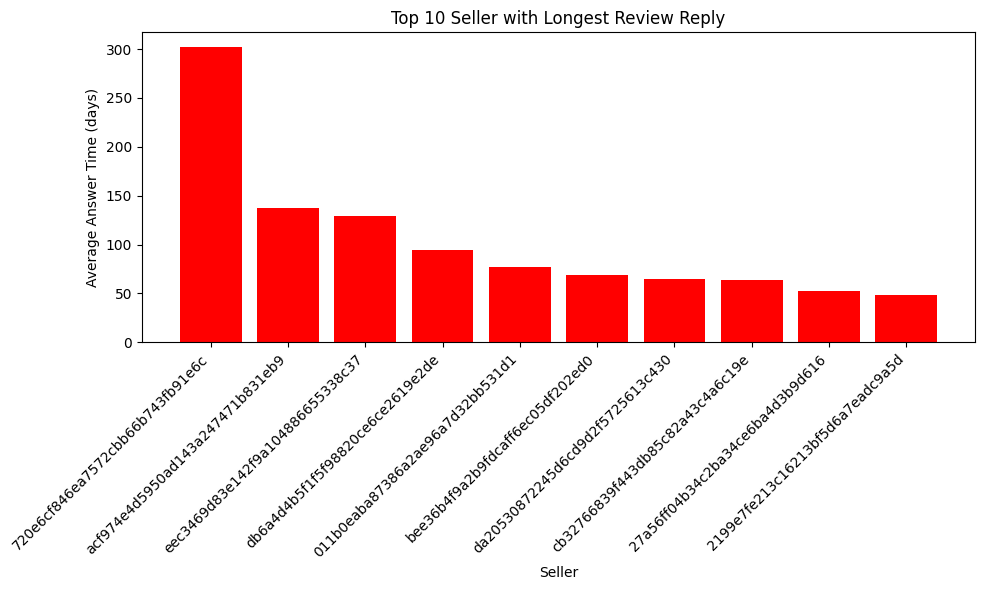

In [239]:
# Sellers with the slowest average answer
top_10_answer = average_answer_time_per_seller.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_answer.index, top_10_answer.dt.days, color='red')

plt.xlabel('Seller')
plt.ylabel('Average Answer Time (days)')
plt.title('Top 10 Seller with Longest Review Reply')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight**

- There are some sellers who take less than a day to reply to reviews from customers, such as sellers with id dd9661d3cda1e6feb237f0c4d8b26f2e.

- Some sellers take a long time to reply to customer reviews, such as seller with id 720e6cf846ea7572cbb66b743fb91e6c who takes 300 days to do so.

### RFM Analysis

To answer the last three analysis questions, we can use an advanced analysis technique called RFM analysis. Simply put, RFM analysis is one of the commonly used methods to segment customers (grouping customers into categories) based on three parameters, namely recency, frequency, and monetary.

- Recency: a parameter used to see when a customer last made a transaction.

- Frequency: this parameter is used to identify how often a customer makes a transaction.
- Monetary: this last parameter is used to identify how much revenue comes from the customer.

In [240]:
rfm_df = df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # retrieve last order date
    "order_id": "nunique", # calculate order quantity
    "price": "sum" # calculate the amount of revenue generated
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,377
4,000379cdec625522490c315e70c7a9fb,1,93.00,147


In [241]:
avg_recency = round(rfm_df.recency.mean(), 1)
print("Average recency: ", avg_recency)

Average recency:  238.4


In [242]:
avg_frequency = round(rfm_df.frequency.mean(), 2)
print("Average frequency: ", avg_frequency)

Average frequency:  1.0


In [243]:
avg_monetary = rfm_df.monetary.mean()
print("Average monetary: ", avg_monetary)

Average monetary:  143.22829238032153


<ipython-input-244-fbdb2ab73231>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_id", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[0])
<ipython-input-244-fbdb2ab73231>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_id", x="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[1])


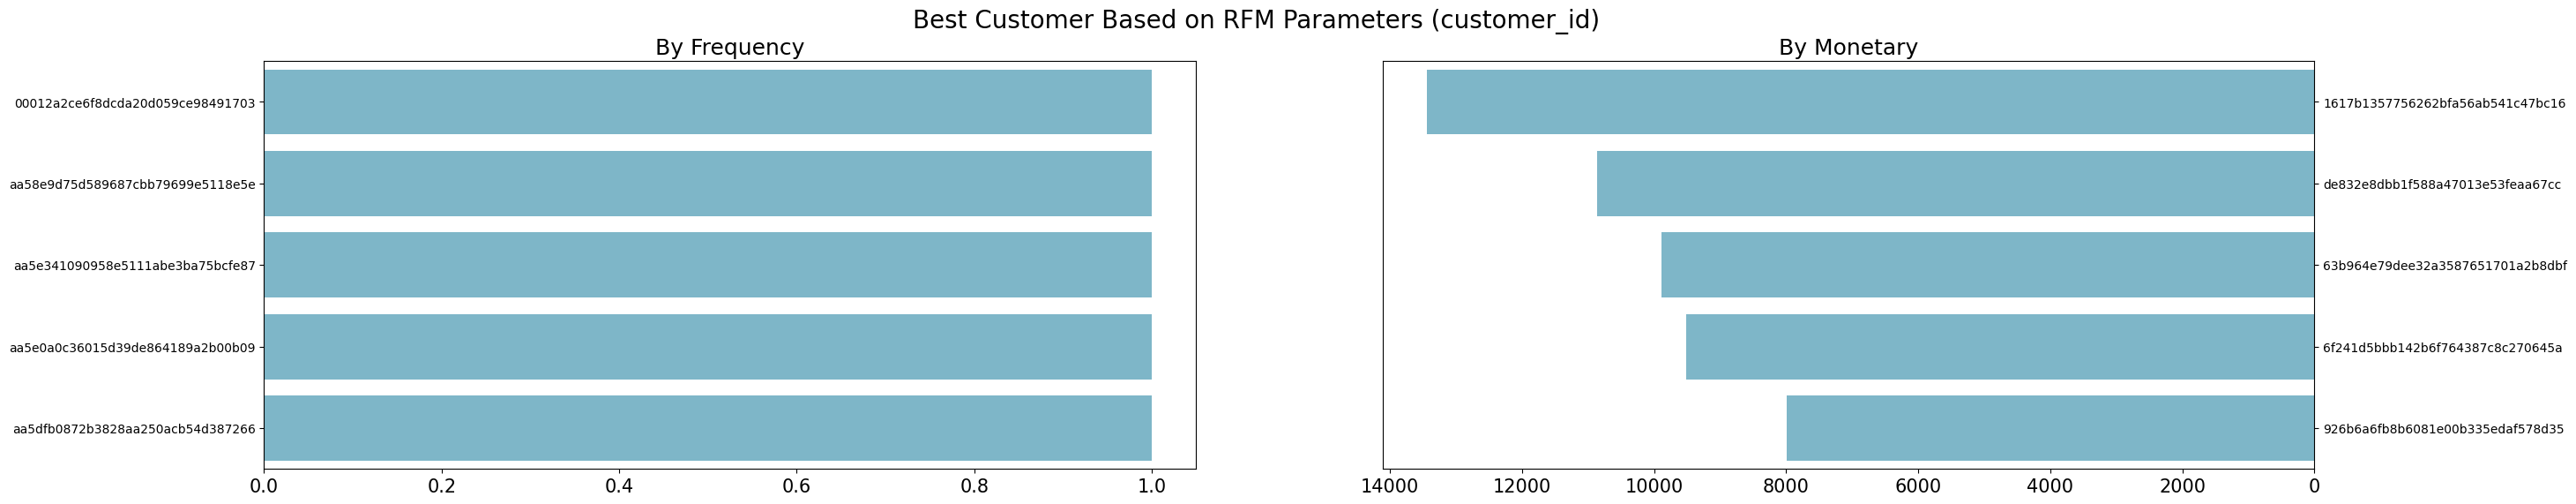

In [244]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="customer_id", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Frequency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="customer_id", x="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].set_title("By Monetary", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight**

- The average time until a customer makes a repeat transaction is 238.4 days or 238 days.

- The average number of times a customer makes a repeat transaction is 1 time.
- The average revenue earned from a customer is US$143.23.

# Clustering
Clustering is one of the methods that can be done to look at customer segmentation. This can be done to see the categories of existing customers based on factors such as the number of orders and revenue provided to the company. By knowing customer segmentation, companies can create more specific strategies to improve their business.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [ ]:
# Creating df for clustering
df_clus = df.groupby('customer_id').agg({'order_id': 'count', 'price': 'sum'}).reset_index()

df_clus.head()

,customer_id,order_id,price
0,00012a2ce6f8dcda20d059ce98491703,1,89.80
1,000161a058600d5901f007fab4c27140,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99
3,0002414f95344307404f0ace7a26f1d5,1,149.90
4,000379cdec625522490c315e70c7a9fb,1,93.00


In [ ]:
# Features used
feature = ['order_id', 'price']
x = df_clus[feature].values

In [ ]:
# Data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = pd.DataFrame(sc.fit_transform(x))

In [ ]:
# Using elbow method to determine clusters
wcss = []
for n in range(1,11):
  kmeans = KMeans(n_clusters = n, init = 'k-means++')
  kmeans.fit(x_sc)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

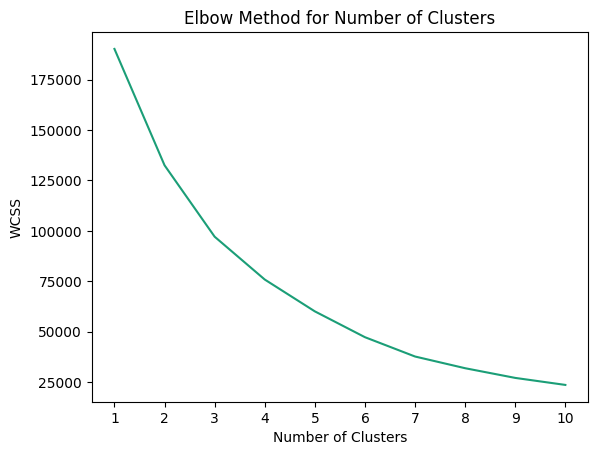

In [ ]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.title('Elbow Method for Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Creating a clustering model
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(x_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
Cluster = kmeans.fit_predict(x_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add a cluster column
df_clus['Cluster'] = kmeans.labels_
df_clus.head()

,customer_id,order_id,price,Cluster
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,1
1,000161a058600d5901f007fab4c27140,1,54.90,1
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,1
3,0002414f95344307404f0ace7a26f1d5,1,149.90,1
4,000379cdec625522490c315e70c7a9fb,1,93.00,1


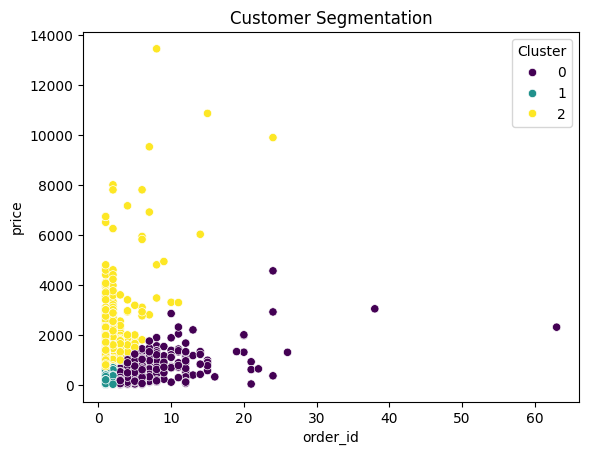

In [ ]:
# Cluster visualization
title = 'Customer Segmentation'
plot = sns.scatterplot(data=df_clus, x='order_id', y='price', hue='Cluster', palette='viridis')
plot_title = plt.title(title)

<ipython-input-159-ff7d37d7aed3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')


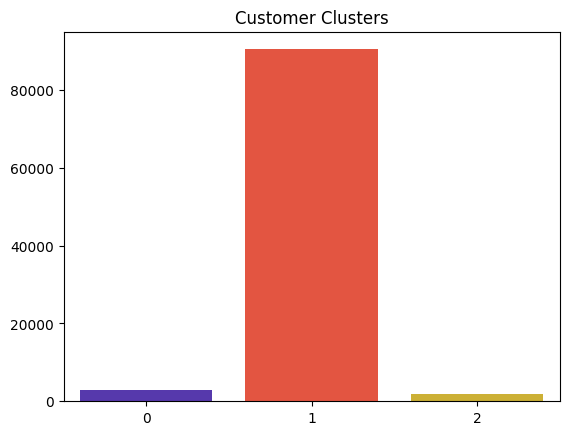

In [ ]:
# Number of customers in the cluster
data_plot  = df_clus['Cluster'].value_counts().to_list()
label_plot = df_clus['Cluster'].value_counts().index.to_list()

title = 'Customer Clusters'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [ ]:
df_clus['Cluster'].value_counts()

1    90434
0     2839
2     1836
Name: Cluster, dtype: int64

In [ ]:
# View the average order quantity and order price for each cluster
display(df_clus.groupby('Cluster').agg(['mean']))

<ipython-input-161-724da9d34c3c>:2: FutureWarning: ['customer_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(df_clus.groupby('Cluster').agg(['mean']))


,order_id,price
,mean,mean
Cluster,,
0,4.104614,289.216552
1,1.097740,115.085555
2,1.329521,1303.685637


**Insights and Suggestions**

**Cluster 0 (high orders and medium revenue): Average order of 4 times and revenue to the company of US$289.21**

- Increase average transaction value by offering product bundling, upselling, and cross-selling.

- Use customer data to offer relevant products based on previous purchases, provide personalized recommendations, and communicate with them through their preferred channels.
- Reward customers in this cluster who make frequent purchases and provide positive feedback. Also offer attractive loyalty programs to encourage them to become loyal customers.

**Cluster 1 (low orders and revenue): Average order of 1 time and revenue to the company of US$115.08**

- Focus on efforts to increase customer retention, such as offering loyalty programs, personalized recommendations, and post-purchase engagement.

- Analyze the reasons why customers in this cluster do not make repeat purchases. You can conduct surveys, analyze customer journey data, and study customer feedback to understand the reasons for churn and find solutions to overcome them.
- Offer special programs to encourage customers in this cluster to make more frequent purchases, such as special discounts, free shipping, or attractive product bundling.

**Cluster 2 (low orders and high revenue): Average order of 1 time and revenue to the company of US$1,303.68**

- Customers in this cluster are most likely to be customers who make a large contribution to the company's revenue. Focus on retaining these customers by providing the best service, offering attractive loyalty programs, and building good relationships with them.

- Offer premium programs to customers in this cluster with exclusive benefits, such as early access to new products, special discounts, and customer priority services.


# Creating a Simple Dashboard with Streamlit

In [ ]:
# Saving a new dataset
df.to_csv("all_data.csv", index=False)

**Conclusion**

From the insights gained from the data, it can be seen that the company is in a good position overall, but given some issues and shortcomings, the following suggestions can be considered to improve the company's performance:

- Maintain the good rating by improving the quality of goods, delivery, and related matters.

- Given that there are a number of customers who gave a rating of 1, it is important to pay attention to the feedback and speed up customer service if necessary.
- Investigate the reasons for the cancellation and find solutions to prevent it from happening again.
- Focus on the market in Sao Paulo by offering special promotions, improving delivery services, and strengthening branding there.
- Expand to cities that have few customers and sellers by offering attractive programs to attract new customers and sellers.
- Customer demographic data is needed to further analyze their behavior.
- Increase engagement with active customers through loyalty programs, special offers, and interesting content to keep active customers loyal to shop on e-commerce applications.
- Offer attractive promos, email reminders, or personalized product recommendations to attract inactive customers back.
- Implement an item recommendation system and offer attractive promos to increase sales and attract customers to place more orders.

- Rewarding top sellers to motivate them and improve their service quality.
- Helping sellers who get few orders to improve their performance by providing training, product listing optimization, and promotion programs.
- Organize promos, improve marketing campaigns, and offer special discounts to boost sales in certain months.
- Analyze factors that contribute to high revenue in a particular month such as best-selling products, effective marketing strategies, and market trends.
- Further promote best-selling products by increasing their visibility in the app, and offering bundling with other products.
- Provide payment options that match customer preferences (in this case, credit card) for various products.
- Encourage sellers to respond to orders faster by providing education on the benefits of fast response, such as increasing customer satisfaction and sales.
- Assist sellers in improving the shipping process by providing guidance and efficient logistics solutions.
- Monitor performance and work with freight forwarders in cities that have long delivery times to improve delivery speed in these areas.

- Encourage sellers to reply to reviews as a form of appreciation to customers and build good relationships.
- Increase customer retention by offering loyalty programs, personalized recommendations, and post-purchase engagement.
- Increase average transaction value by offering product bundling, upselling, and cross-selling.